# About

## Code for related figures，Baihua Wu

# Fig.1

## Fig.1g

In [1]:
library("Seurat")
library("dplyr")
library("ggplot2")
library("ggpubr")
scdata <- readRDS("/sibcb1/huilijianlab1/wubohua/R/BGI_20211223/Rscript/data/20231124_DDC-SCST_NG_revision_scRNA-seq_94_libs_annotation.rds")
# based on this metadata, "20231124_DDC-SCST_NG_revision_scRNA-seq_94_libs_metadata_annotation.rds"

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
data=scdata

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



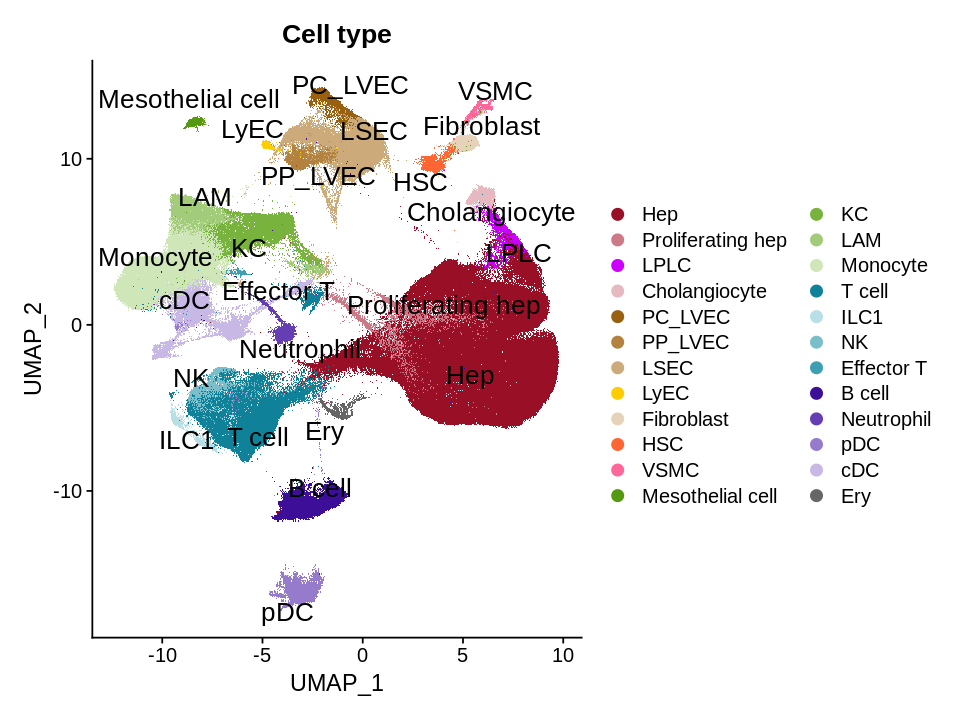

In [3]:
theme_set(theme_bw(base_size = 15))
col=c('#990F26','#CC7A88','#CC00FF','#E6B8BF','#99600F','#B3823E','#CCAA7A','#FFCC00','#E6D2B8','#FF6633','#FF6699',
       '#54990F','#78B33E','#A3CC7A','#CFE6B8','#0F8299','#B8DEE6','#7ABECC','#3E9FB3','#3D0F99','#653EB3','#967ACC','#C7B8E6','#666666','#999999')
options(repr.plot.width=8, repr.plot.height=6)
p <- DimPlot(data, reduction = "umap",label = T, repel = TRUE,group.by = "annotation",cols=col,label.size =5.5)+ggtitle("Cell type")
p

# Fig.2

## Fig.2a

,X_LogP_Hepa.domain,X_LogP_LPLC.domain,X_LogP_Chol.domain
,<dbl>,<dbl>,<dbl>
Ribosome - Mus musculus (house mouse),0,-25.161320,-32.267972
ribosomal large subunit biogenesis,0,-5.014431,-6.457918
inflammatory response,0,-8.833562,-3.653551
Neutrophil degranulation,0,-14.623461,-9.027698
innate immune response,0,-7.420404,-6.626670
regulation of tumor necrosis factor production,0,-7.150408,-7.504959


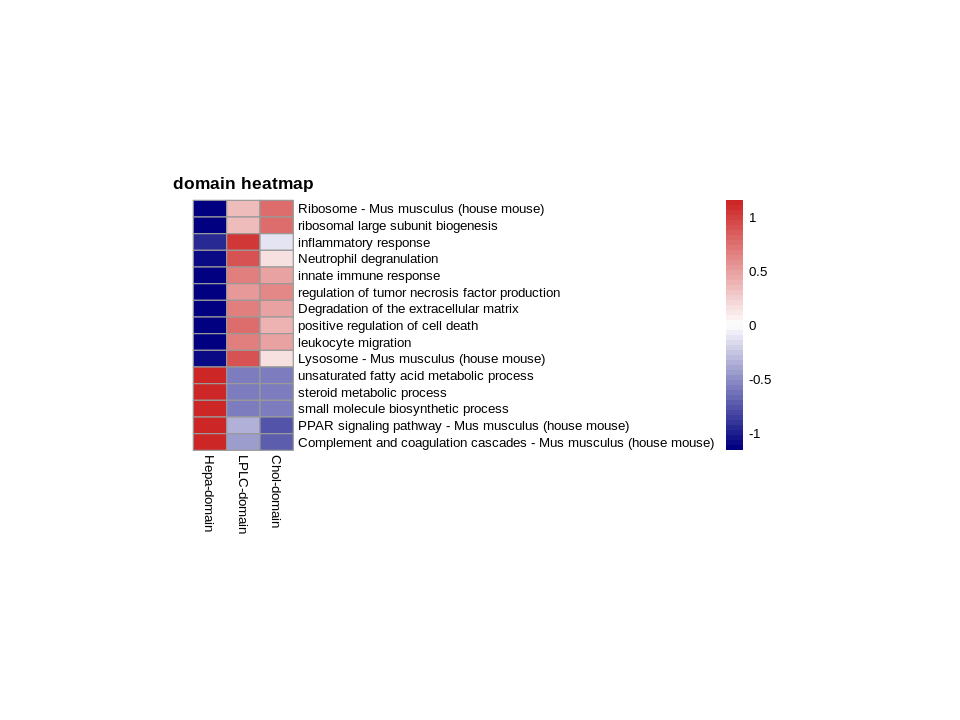

In [4]:
cts<- read.csv("./data/HeatmapSelectedGO.csv",row.names = 2)[,-1]
#"HeatmapSelectedGO.csv",included in the source data, was exported from metascape using the overlap of D17vsD0 DEG and Domain DEG in Stereo-seq (Supplementary table 3).
head(cts)
colnames(cts)=c("Hepa-domain","LPLC-domain","Chol-domain")
library(pheatmap)
cts=abs(cts)
b<-pheatmap(cts,scale = "row",show_rownames = T, main=paste0("domain heatmap"),cellwidth = 20, cellheight = 10,cluster_col = F,cluster_row =F, 
            color = colorRampPalette(c("navy", "white", "firebrick3"))(50),treeheight_col=10,treeheight_row=10,fontsize = 8)

## Fig.2b

In [5]:
library("Seurat")
library("dplyr")
library("ggplot2")
library(patchwork)
library(viridis)
domaindata <- readRDS("/sibcb1/huilijianlab1/wubohua/R/BGI_20211223/Spatial_20230523/Spatial_domain/DDC_ST_domain_22slide_modulescore_20230531.rds")
# Based on this rds, "20230517_Niche_22_slides_data_annotation_advanced_ed2.rds", which contained domain annotation across 22 slides.
# This file contained module score, gene lists were listed in the supplementary table 2.

Loading required package: viridisLite



In [6]:
data=domaindata

In [7]:
# draw by domain
featureModule_niche <- function(timelist, feature_list) {
  meta <- data@meta.data
  meta <- meta[meta$time == timelist, c("annotation_macro", feature_list)]
  
  res.df <- matrix(rep(0, 4*length(feature_list)), nrow = 4) %>% as.data.frame()
  rownames(res.df) <- c("Hepa-domain","LPLC-domain","Chol-domain","Portal vein-area")
  colnames(res.df) <- feature_list
  for (i in c("Hepa-domain","LPLC-domain","Chol-domain","Portal vein-area")) {
    meta.layer <- meta[meta$annotation_macro == i,]
    res.df[i,] <- apply(meta.layer[,feature_list, drop=F], 2, mean)
  }
  res.df <- t(res.df) %>% as.data.frame()
  colnames(res.df) <- paste0(timelist, "_", colnames(res.df))
  rownames(res.df) <- names(feature_list)
  return(res.df)
}
pathways <- c('DAMPpaper1','Oxidate1','DNAdamage1','senescenceGO1','inflacytochem1','ECM1')
names(pathways) <- gsub("1$", "", pathways)

In [8]:
for (i in c("D0","D8","D17","R2","R7","R21")) {
  if (i == "D0") {
    pathways.df <- featureModule_niche(i, pathways)
  } else {
    t.df <- featureModule_niche(i, pathways)
    pathways.df <- cbind(pathways.df, t.df)
  }
}; rm(t.df)

# select the D0,D8 and D17 time points
info=pathways.df[,c(1,3,5,6,7,9,10,11,13:15,17:19,21:23)]
info

,D0_Hepa-domain,D0_Chol-domain,D8_Hepa-domain,D8_LPLC-domain,D8_Chol-domain,D17_Hepa-domain,D17_LPLC-domain,D17_Chol-domain,R2_Hepa-domain,R2_LPLC-domain,R2_Chol-domain,R7_Hepa-domain,R7_LPLC-domain,R7_Chol-domain,R21_Hepa-domain,R21_LPLC-domain,R21_Chol-domain
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DAMPpaper,-0.0504073324,-0.009811213,-0.039425536,-0.033632049,-0.012189882,-0.025632415,0.007250304,0.02732827,-0.015498249,0.01611868,0.03912568,-0.028166284,0.0004532437,0.03219355,-0.040189915,-0.01205312,0.002307032
Oxidate,-0.2063268162,-0.063115984,0.289984520,0.321456785,0.313259486,0.570914417,0.662831111,0.60031226,0.235928603,0.27884587,0.23161309,-0.074196476,0.0479091037,0.01859700,-0.160616804,-0.09528731,-0.064779263
DNAdamage,-0.0092503924,0.002493667,0.004136527,-0.002046512,0.008466913,0.005383978,0.006788295,0.01798755,0.015558734,0.01359382,0.02803437,-0.004498118,0.0004148230,0.01299085,-0.015937217,-0.01141424,-0.007318267
senescenceGO,0.0078990893,0.024356897,0.020347303,0.024469212,0.028710850,0.027433930,0.041270195,0.05214796,0.026929462,0.03838444,0.04919499,0.021122219,0.0360696484,0.04583611,0.008556209,0.01779042,0.028857657
inflacytochem,-0.0434035712,-0.038811153,-0.021762000,-0.015071729,-0.009747461,0.005024318,0.043858848,0.04662001,0.005695991,0.03143184,0.06589361,-0.020487722,0.0139261752,0.03594799,-0.027809592,-0.01873503,-0.014915719
ECM,0.0003106546,0.027669494,0.010616293,0.019207939,0.034134956,0.016076337,0.043069979,0.07870598,0.028009056,0.05870592,0.08922071,0.023616303,0.0510761155,0.08866814,0.003493676,0.02670006,0.046910832


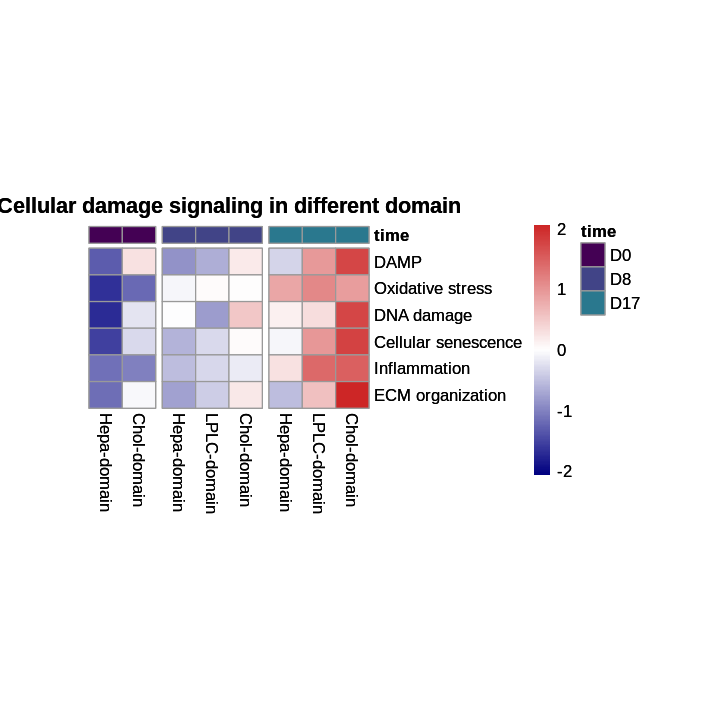

In [9]:
options(repr.plot.width = 6, repr.plot.height = 6)
ann_colors = list(time = c(D0="#440154FF",D8= "#414487FF",D17="#2A788EFF")) 

info2=info[,c(1:8)]
row.names(info2)=c("DAMP","Oxidative stress","DNA damage","Cellular senescence","Inflammation","ECM organization")

annotation_col=data.frame(time = factor(c(rep("D0",2),rep("D8",3),rep("D17",3)),
                                        levels=c("D0","D8","D17")), row.names = colnames(info2))
p=pheatmap::pheatmap(info2, show_colnames = T, scale = "row",
                      gaps_col = c(2,5),
                      labels_col = c("Hepa-domain","Chol-domain",rep(c("Hepa-domain","LPLC-domain","Chol-domain"),2)),  
                      cluster_rows =F,annotation_colors=ann_colors,
                      cluster_cols = F, annotation_col = annotation_col, color = colorRampPalette(c("navy",
                                                                                                    "white", "firebrick3"))(200),cellheight = 16,cellwidth = 20,fontsize = 10,main="Cellular damage signaling in different domain")
p

## Fig.2d

In [10]:
library("Seurat")
library("dplyr")
library("ggplot2")
library("ggpubr")
data=scdata

In [11]:
# module score calculation, this list was from supplementary table 2.
ref.DAMPpaper=list(c("Bgn","Trem2","Trem1","Tlr3","Tlr2","Nlrp3","Cgas","Tlr4","Tlr9","Tlr7","Fpr1","Casr","Fpr2","Fpr3","Gprc6a","Aim2","Trpm2","Clec9a","Clec4e","Clec7a","Rigi","Ifih1","Ager","Fpr1","P2ry2","P2ry6","P2ry12","P2rx7"))
ref.Oxidate=list(c("Nfe2l2","Gsr","Txnrd1","Gclc","Mt1","Mt2","Fth1","Hmox1","Txnip","Nqo1","Srxn1","Gsta1","Gsta2","Gstm2"))

In [12]:
options(warn=-1)
for (i in ls(pattern = "ref.")) {
  data <- AddModuleScore(object = data, features = get(i), name = gsub("ref.", "", i))
}; rm(i)

In [13]:
Idents(data)="time"
#diffcellmean module score
diffcellmeanModule=function(pathways,x){
  meta = x@meta.data
  celltypes = unique(meta$anno_Hepmerge)
  res.df  = as.data.frame(matrix(nrow=length(celltypes),ncol=length(pathways)))
  rownames(res.df) <- celltypes
  colnames(res.df)=pathways
  for (type in celltypes) {
    cell.data = subset(x, subset = anno_Hepmerge == type)
    matrix = cell.data@meta.data[,pathways]
    result = apply(matrix, 2, mean)
    res.df[type,pathways] <- result
  }
  return(res.df)
}

In [14]:
D17=subset(data,idents='D17')
pathways_D17 <- c("DAMPpaper1","Oxidate1")
info_D17=diffcellmeanModule(pathways_D17,D17)
info2_D17=info_D17[c("Hep","LPLC","Cholangiocyte","PC_LVEC","PP_LVEC","LSEC","LyEC","Fibroblast","HSC","VSMC","Mesothelial cell","KC","LAM","Monocyte","T cell","ILC1","NK","Effector T","B cell","Neutrophil","pDC","cDC"),]

D0=subset(data,idents='D0')
pathways_D0 <- c("DAMPpaper1","Oxidate1")
info_D0=diffcellmeanModule(pathways_D0,D0)
info2_D0=info_D0[c("Hep","LPLC","Cholangiocyte","PC_LVEC","PP_LVEC","LSEC","LyEC","Fibroblast","HSC","VSMC","Mesothelial cell","KC","LAM","Monocyte","T cell","ILC1","NK","Effector T","B cell","Neutrophil","pDC","cDC"),]

D8=subset(data,idents='D8')
pathways_D8 <- c("DAMPpaper1","Oxidate1")
info_D8=diffcellmeanModule(pathways_D8,D8)
info2_D8=info_D8[c("Hep","LPLC","Cholangiocyte","PC_LVEC","PP_LVEC","LSEC","LyEC","Fibroblast","HSC","VSMC","Mesothelial cell","KC","LAM","Monocyte","T cell","ILC1","NK","Effector T","B cell","Neutrophil","pDC","cDC"),]

info_total=cbind(t(info2_D0),t(info2_D8),t(info2_D17))
info_total

,Hep,LPLC,Cholangiocyte,PC_LVEC,PP_LVEC,LSEC,LyEC,Fibroblast,HSC,NA,⋯,LAM,Monocyte,T cell,ILC1,NK,Effector T,B cell,Neutrophil,pDC,cDC
DAMPpaper1,-0.06158523,-0.07187226,-0.1062804,-0.0300133,-0.04300623,-0.04259383,-0.09500827,-0.0508867,0.01610090,NA,⋯,0.1677560,0.1718610,-0.06062630,-0.07034054,-0.06130298,0.09974085,-0.05223619,0.2370412,-0.03076110,0.07609796
Oxidate1,-0.11372728,-0.06454027,-0.0728101,0.0727322,-0.01956811,0.12052197,0.10329801,0.3398120,0.08223404,NA,⋯,0.3042491,0.2379369,-0.07855914,-0.10089107,-0.10474648,0.23080926,-0.03346855,0.5176128,-0.03399356,0.05447691


In [15]:
colnames(info_total)= c("Hep_D0","LPLC_D0","Cholangiocyte_D0","PC_LVEC_D0","PP_LVEC_D0","LSEC_D0","LyEC_D0","Fibroblast_D0","HSC_D0","VSMC_D0","Mesothelial cell_D0","KC_D0","LAM_D0","Monocyte_D0","T cell_D0","ILC1_D0","NK_D0","Effector T_D0","B cell_D0","Neutrophil_D0","pDC_D0","cDC_D0",
                        "Hep_D8","LPLC_D8","Cholangiocyte_D8","PC_LVEC_D8","PP_LVEC_D8","LSEC_D8","LyEC_D8","Fibroblast_D8","HSC_D8","VSMC_D8","Mesothelial cell_D8","KC_D8","LAM_D8","Monocyte_D8","T cell_D8","ILC1_D8","NK_D8","Effector T_D8","B cell_D8","Neutrophil_D8","pDC_D8","cDC_D8",
                        "Hep_D17","LPLC_D17","Cholangiocyte_D17","PC_LVEC_D17","PP_LVEC_D17","LSEC_D17","LyEC_D17","Fibroblast_D17","HSC_D17","VSMC_D17","Mesothelial cell_D17","KC_D17","LAM_D17","Monocyte_D17","T cell_D17","ILC1_D17","NK_D17","Effector T_D17","B cell_D17","Neutrophil_D17","pDC_D17","cDC_D17")

# sort the order by each cell type
info_total2=info_total[,c(1,22+1,44+1,2,2+22,2+44,3,3+22,3+44,4,4+22,4+44,5,5+22,5+44,
                          6,6+22,6+44,7,7+22,7+44,8,8+22,8+44,9,9+22,9+44,10,10+22,10+44,
                          11,11+22,11+44,12,12+22,12+44,13,13+22,13+44,14,14+22,14+44,20,20+22,20+44,
                          15,15+22,15+44,16,16+22,16+44,17,17+22,17+44,18,18+22,18+44,19,19+22,19+44,
                          21,21+22,21+44,22,22+22,22+44)]
info_total2

,Hep_D0,Hep_D8,Hep_D17,LPLC_D0,LPLC_D8,LPLC_D17,Cholangiocyte_D0,Cholangiocyte_D8,Cholangiocyte_D17,PC_LVEC_D0,⋯,Effector T_D17,B cell_D0,B cell_D8,B cell_D17,pDC_D0,pDC_D8,pDC_D17,cDC_D0,cDC_D8,cDC_D17
DAMPpaper1,-0.06158523,-0.05826694,-0.0667445,-0.07187226,-0.07795828,-0.09722755,-0.1062804,-0.08366059,-0.09575665,-0.0300133,⋯,0.09974085,-0.08230744,-0.05659066,-0.05223619,-0.03384931,-0.0256976,-0.03076110,0.001914967,0.0240591,0.07609796
Oxidate1,-0.11372728,0.47555622,0.6153639,-0.06454027,0.66978251,0.80191885,-0.0728101,0.05977634,0.24368185,0.0727322,⋯,0.23080926,-0.15264274,-0.13617785,-0.03346855,-0.18347942,-0.1462104,-0.03399356,-0.204809542,-0.1104057,0.05447691


In [16]:
row.names(info_total)=c("DAMP","Oxidative stress")

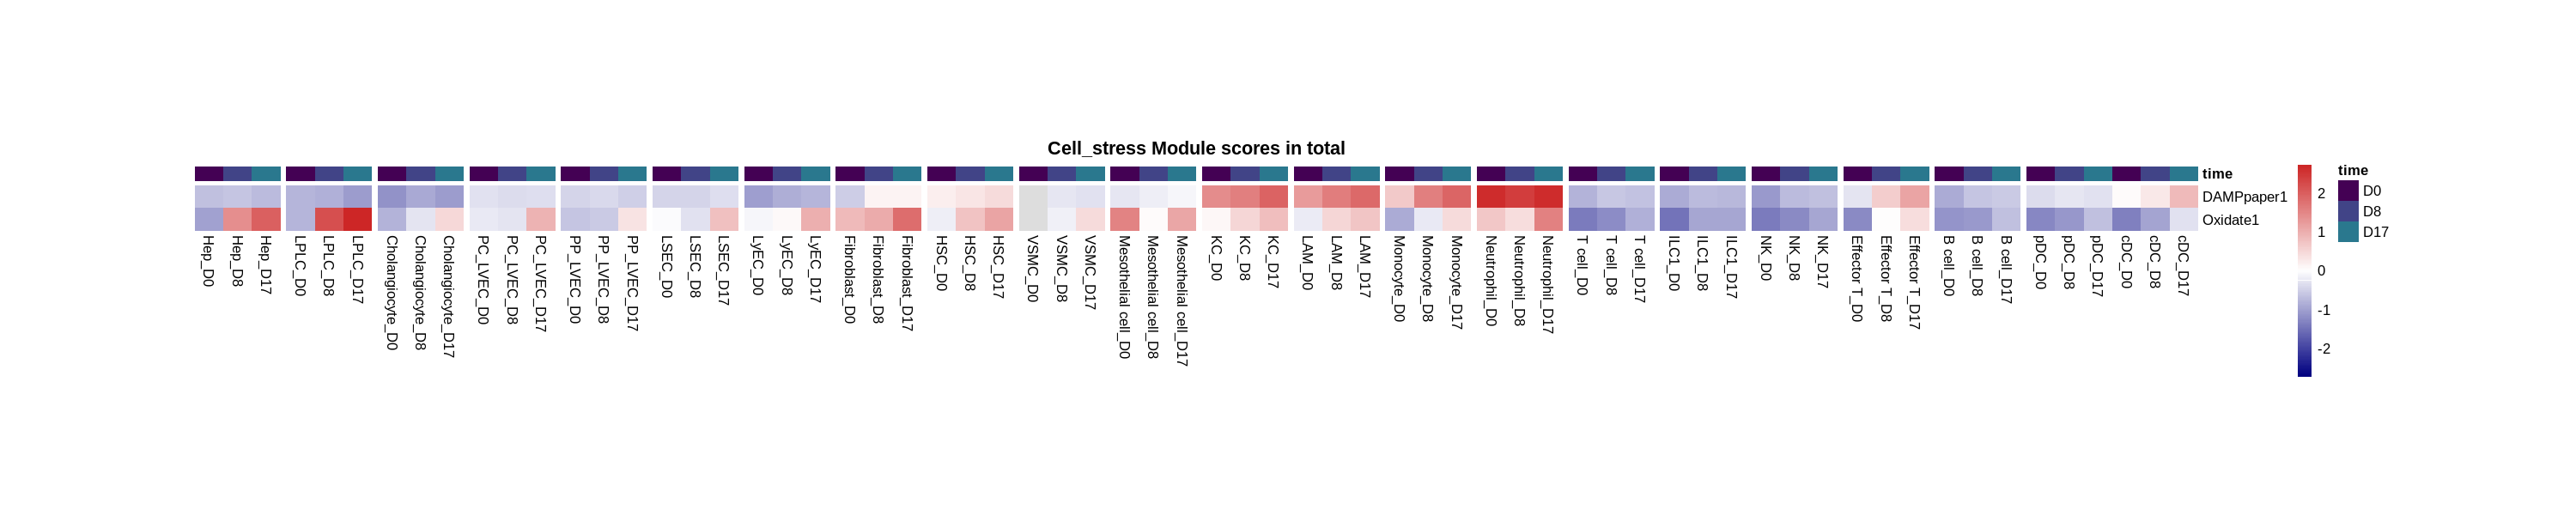

In [17]:
options(repr.plot.width = 25, repr.plot.height = 5)
annotation_col=data.frame(time = factor(rep(c("D0","D8","D17"), 22),
                                        levels=c("D0","D8","D17")), row.names = colnames(info_total2))
ann_colors = list(time = c(D0="#440154FF",D8= "#414487FF",D17="#2A788EFF"))  
map=pheatmap::pheatmap(info_total2, show_rownames = T, scale = "row", gaps_col = c(1:20)*3,
                       cluster_rows =F,border_color=NA,,annotation_col = annotation_col,annotation_colors=ann_colors,
                       cluster_cols = F,cellheight = 16,cellwidth = 20,fontsize = 10, color = colorRampPalette(c("navy",
                                                                                                                 "white", "firebrick3"))(200),main="Cell_stress Module scores in total")

## Fig.2e

In [18]:
library("Seurat")
library("dplyr")
library("ggplot2")
library(patchwork)
library(viridis)
spatialdata <- readRDS("/sibcb1/huilijianlab1/wubohua/R/BGI_20211223/Rscript/data/20230530_DDC-SCST_NG_revision_Stereo-seq_22_slides_annotation_for_web.rds")
# Based on this metadata,"20230530_DDC-SCST_NG_revision_Stereo-seq_22_slides_metadata_annotation_for_web.rds", including module score.

In [19]:
data=spatialdata

In [20]:
# draw by layers
featureModule <- function(timelist, feature_list) {
  meta <- data@meta.data
  meta <- meta[meta$time == timelist, c("rank", feature_list)]
  
  res.df <- matrix(rep(0, 9*length(feature_list)), nrow = 9) %>% as.data.frame()
  rownames(res.df) <- c(1:9); colnames(res.df) <- feature_list
  for (i in c(1:9)) {
    meta.layer <- meta[meta$rank == i,]
    res.df[i,] <- apply(meta.layer[,feature_list, drop=F], 2, mean)
  }
  res.df <- t(res.df) %>% as.data.frame()
  colnames(res.df) <- paste0(timelist, "_layer", colnames(res.df))
  rownames(res.df) <- names(feature_list)
  return(res.df)
}

In [21]:
pathways <- c("LSEC","LyEC")
names(pathways) <- pathways
for (i in c("D0","D8","D17","R2","R7","R21")) {
  if (i == "D0") {
    pathways.df <- featureModule(i, pathways)
  } else {
    t.df <- featureModule(i, pathways)
    pathways.df <- cbind(pathways.df, t.df)
  }
}; rm(t.df)

pathways.dfa=pathways.df

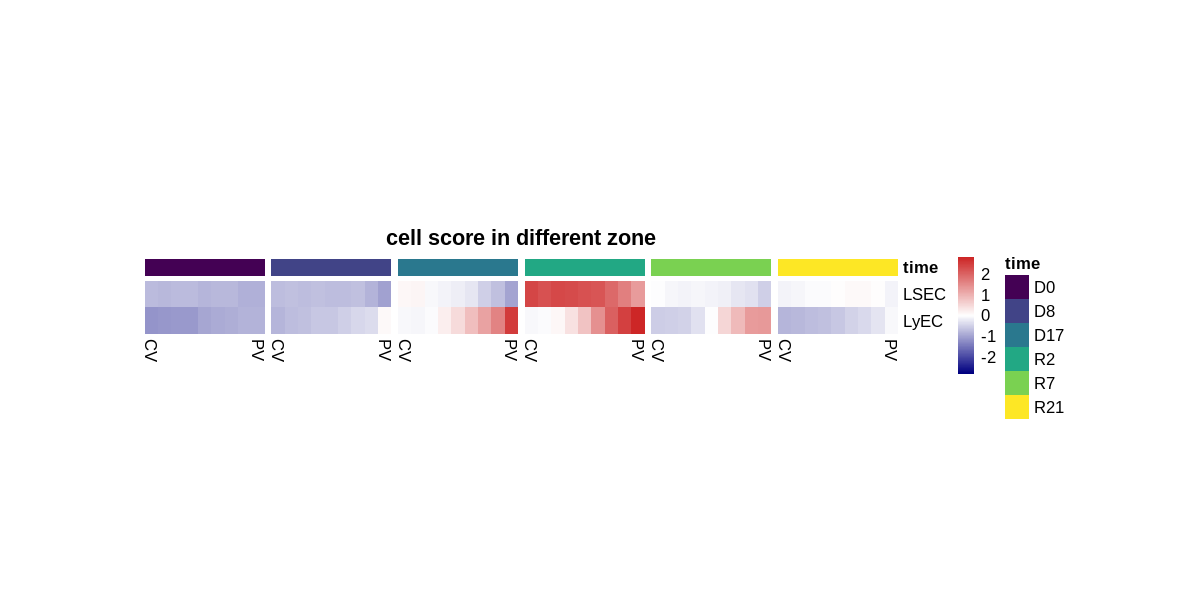

In [22]:
options(repr.plot.width = 10, repr.plot.height = 5)
ann_colors = list(time = c(D0="#440154FF",D8= "#414487FF",D17="#2A788EFF", R2="#22A884FF",R7="#7AD151FF", R21="#FDE725FF"))
annotation_col=data.frame(time = factor(rep(c("D0","D8","D17","R2","R7","R21"),each = 9),levels=c("D0","D8","D17","R2","R7","R21")), row.names = colnames(pathways.dfa))
map=pheatmap::pheatmap(pathways.dfa, show_rownames = T, scale = "row", gaps_col = c(9,18,27,36,45),
                   labels_col = rep(c("CV", rep("", 7),"PV"), 6), annotation_colors=ann_colors,
                   cluster_rows =F,annotation_col = annotation_col, border_color=NA, 
                   cluster_cols = F,cellheight = 16,cellwidth = 8,fontsize = 10, color = colorRampPalette(c("navy",
    "white", "firebrick3"))(200),main="cell score in different zone") 

## Fig.2g

In [23]:
library("Seurat")
library("dplyr")
library("ggplot2")
library("ggpubr")
data <- scdata

In [24]:
Idents(data)="time"
D17=subset(data,idents= "D17")
Idents(D17)="anno_Hepmerge"

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



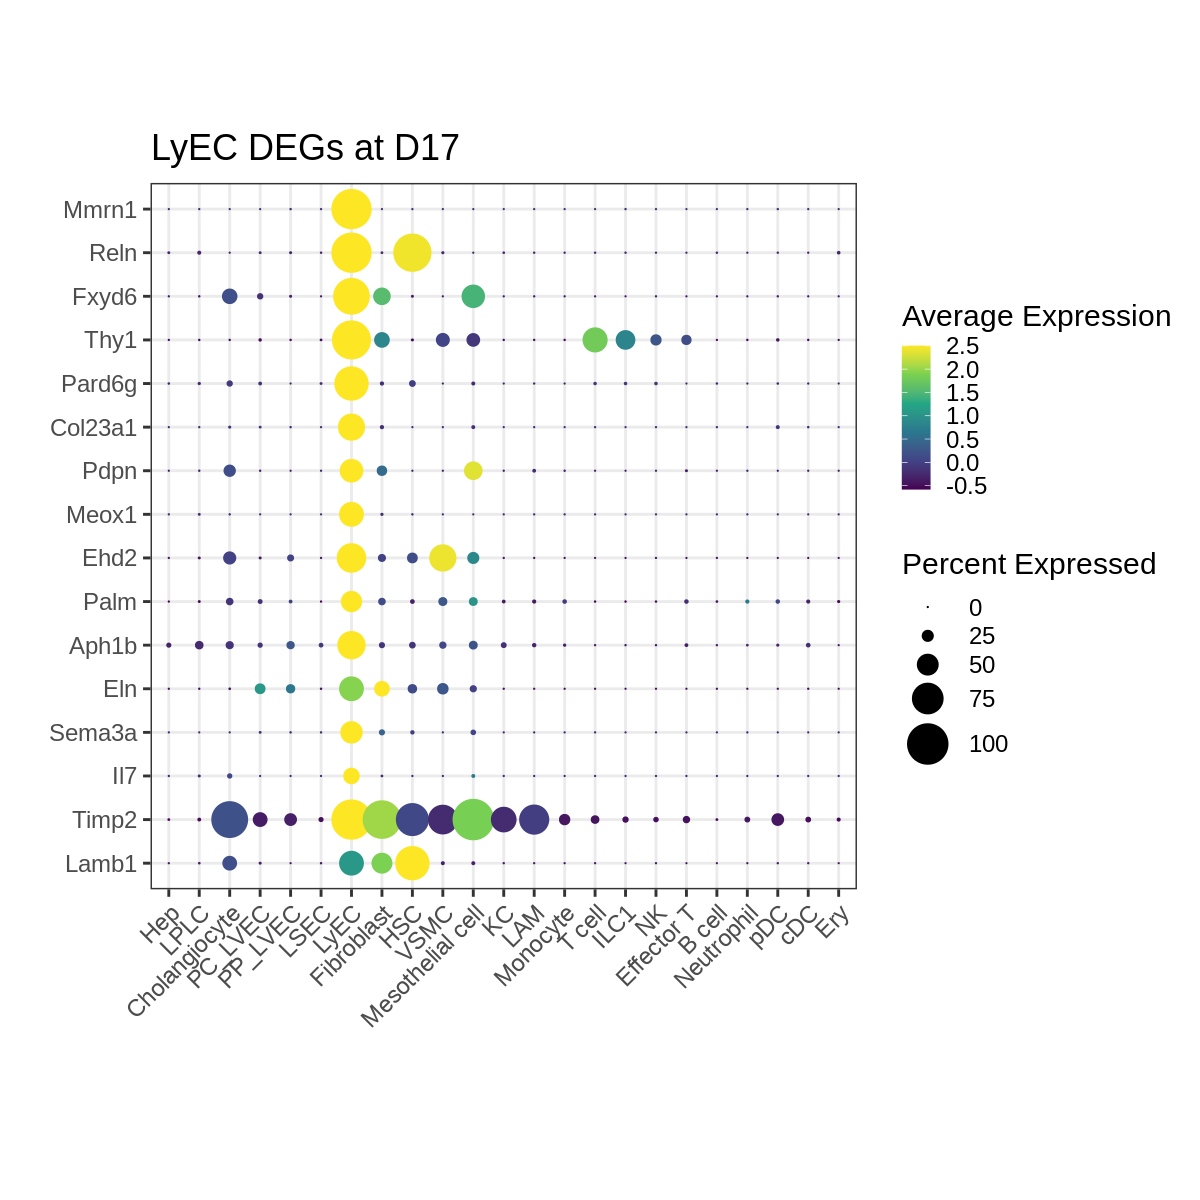

In [25]:
gene=c("Mmrn1","Reln","Fxyd6","Thy1",
       "Pard6g","Col23a1",
       "Pdpn","Meox1",
       "Ehd2","Palm","Aph1b",
       "Eln",
       "Sema3a","Il7","Timp2","Lamb1")
options(repr.plot.width=10, repr.plot.height=10)
p=DotPlot(D17,features=rev(gene),dot.scale=11)+scale_y_discrete("")+scale_x_discrete("")+coord_flip()
p1=p+theme(panel.grid=element_blank())+theme_bw(base_size = 18)+RotatedAxis()+
  scale_color_viridis_c()+labs(x=NULL,y=NULL)+theme(aspect.ratio=1)+ggtitle("LyEC DEGs at D17")
plot(p1)

## Fig.2h

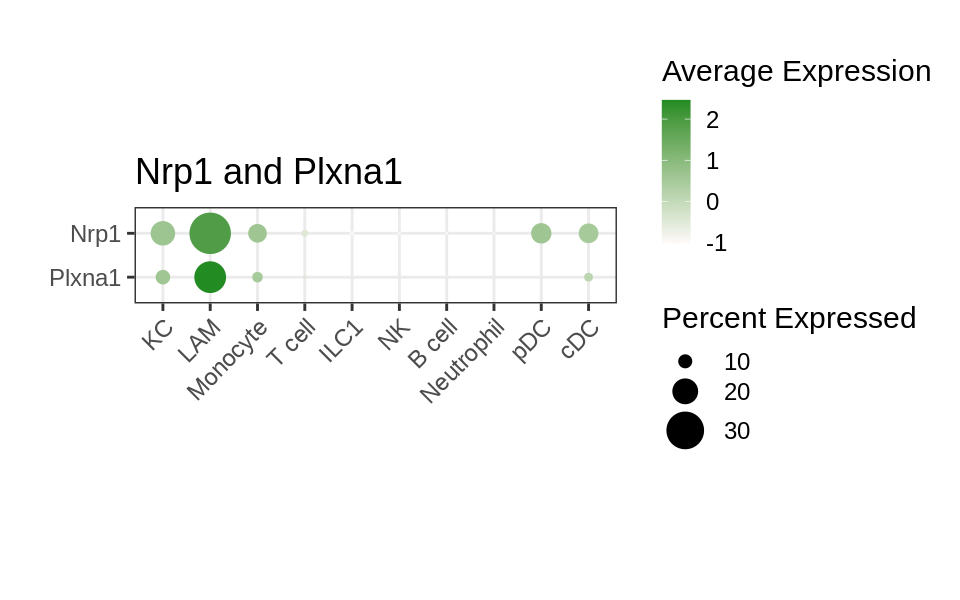

In [26]:
#environment in Fig.2g
Idents(D17)="anno_Hepmerge"
Immune=subset(D17,idents=c("KC","LAM","Monocyte","T cell","ILC1","NK","B cell","Neutrophil","pDC","cDC"))
feature=c("Nrp1","Plxna1")
options(repr.plot.width=8, repr.plot.height=5)
p=DotPlot(Immune,features=rev(feature),dot.scale=11,cols = c("Snow", "#228B22"))+scale_y_discrete("")+scale_x_discrete("")+coord_flip()
p2=p+theme(panel.grid=element_blank())+theme_bw(base_size = 18)+RotatedAxis()+labs(x=NULL,y=NULL)+ggtitle("Nrp1 and Plxna1")+theme(aspect.ratio=0.2)
plot(p2)

# Fig.3

## Fig.3b

In [27]:
library(dplyr)
stsclr=read.csv("data/20230606_revision_ed3_onlyD17_PV_enriched_LRs_sc_overlap_spatial.csv",row.names = 1)
# read this talbe in the Supplementary Table 4. 
# CellChat scRNA-seq D17 vs. D0 & PV upregulated interactions in selected sources and targets.

In [28]:
lrmerge2=stsclr
lrmerge2$receptor2=lrmerge2$receptor 
lrall=c(unique(lrmerge2$gs),unique(lrmerge2$gl1),unique(lrmerge2$gl2),unique(lrmerge2$gr1),unique(lrmerge2$gr2))

In [29]:
#ligand
for (i in unique(lrmerge2$source)){
  print(i)
  celltype=filter(lrmerge2,source==i)
  unique(celltype$ligand) %>% unique %>% length %>% print
}

[1] "LyEC"
[1] 24
[1] "LPLC"
[1] 27
[1] "KC"
[1] 14
[1] "Monocyte"
[1] 12
[1] "LSEC"
[1] 11
[1] "HSC"
[1] 24
[1] "Effector T"
[1] 16
[1] "Mesothelial cell"
[1] 21
[1] "VSMC"
[1] 20
[1] "Hep"
[1] 11
[1] "Cholangiocyte"
[1] 42
[1] "LAM"
[1] 18
[1] "cDC"
[1] 10
[1] "PC_LVEC"
[1] 15
[1] "PP_LVEC"
[1] 17
[1] "Fibroblast"
[1] 24
[1] "pDC"
[1] 7
[1] "NK"
[1] 8
[1] "Neutrophil"
[1] 7
[1] "ILC1"
[1] 6
[1] "T cell"
[1] 4
[1] "Ery"
[1] 2


In [30]:
#receptor
for (i in unique(lrmerge2$target)){
  print(i)
  celltype=filter(lrmerge2,target==i)
  unique(celltype$receptor2) %>% unique %>% length %>% print
}

[1] "LSEC"
[1] 14
[1] "PC_LVEC"
[1] 25
[1] "PP_LVEC"
[1] 19
[1] "HSC"
[1] 30
[1] "Cholangiocyte"
[1] 31
[1] "LAM"
[1] 25
[1] "cDC"
[1] 26
[1] "KC"
[1] 24
[1] "Monocyte"
[1] 19
[1] "B cell"
[1] 5
[1] "pDC"
[1] 22
[1] "LPLC"
[1] 14
[1] "Mesothelial cell"
[1] 11
[1] "Fibroblast"
[1] 16
[1] "VSMC"
[1] 18
[1] "Effector T"
[1] 17
[1] "Neutrophil"
[1] 8
[1] "NK"
[1] 9
[1] "ILC1"
[1] 14
[1] "T cell"
[1] 11
[1] "LyEC"
[1] 19
[1] "Hep"
[1] 6


In [31]:
# boxplots were done in GraphPad.

## Fig.3d

In [32]:
library("Seurat")
library("dplyr")
library("ggplot2")
library("ggpubr")
data = scdata

In [33]:
Idents(data)="time"
D17=subset(data,idents= "D17")
Idents(D17)="anno_Hepmerge"

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



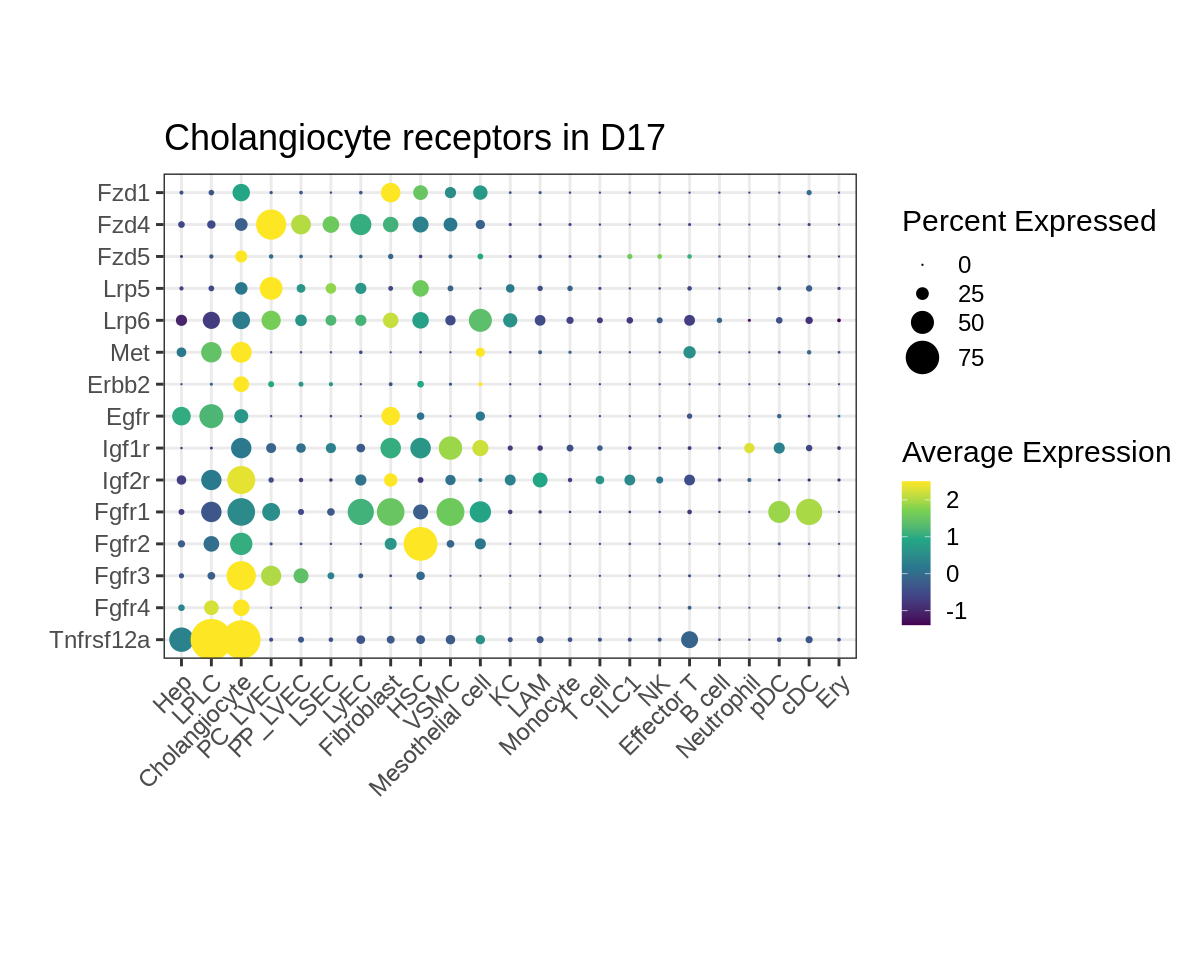

In [34]:
gene=unique(c("Fzd1","Fzd4","Fzd5","Lrp5","Lrp6","Met","Erbb2","Egfr","Igf1r","Igf2r","Fgfr1","Fgfr2","Fgfr3","Fgfr4","Tnfrsf12a"))
options(repr.plot.width=10, repr.plot.height=8)
p=DotPlot(D17,features=rev(gene),dot.scale=11)+scale_y_discrete("")+scale_x_discrete("")+coord_flip()
p2=p+theme(panel.grid=element_blank())+theme_bw(base_size = 18)+RotatedAxis()+
  scale_color_viridis_c()+labs(x=NULL,y=NULL)+ggtitle('Cholangiocyte receptors in D17')+theme(aspect.ratio=0.7)
plot(p2)

## Fig.3e

In [35]:
# environment in Fig.3d.
Idents(D17)="anno_Hepmerge"
Immune=subset(D17,idents=c("KC","LAM","Monocyte","T cell","ILC1","NK","B cell","Neutrophil","pDC","cDC"))

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



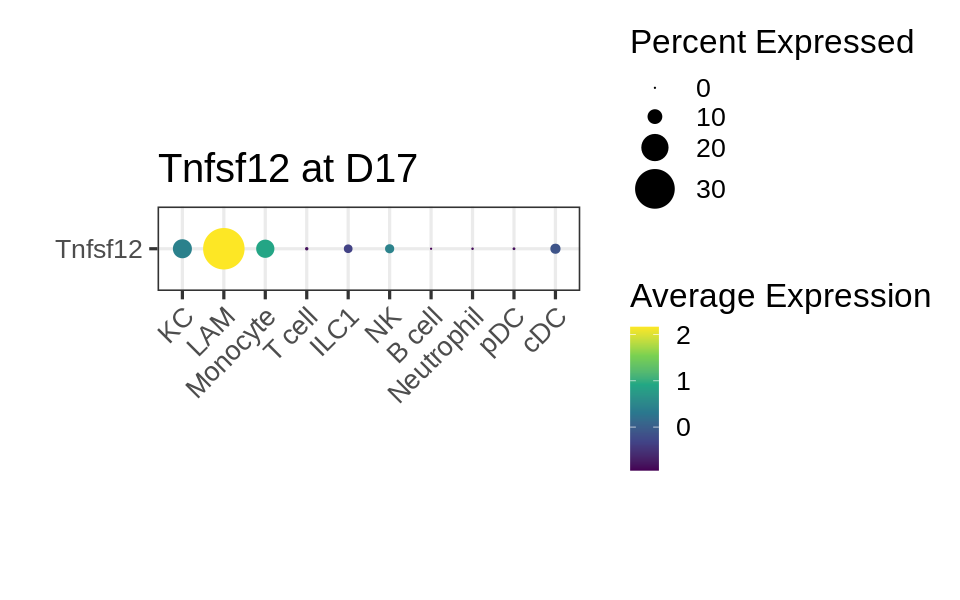

In [36]:
gene=c("Tnfsf12")
options(repr.plot.width=8, repr.plot.height=5)
p=DotPlot(Immune,features=gene,dot.scale=11)+scale_y_discrete("")+scale_x_discrete("")+coord_flip()
p1=p+theme(panel.grid=element_blank())+theme_bw(base_size = 20)+RotatedAxis()+
  scale_color_viridis_c()+labs(x=NULL,y=NULL)+ggtitle('Tnfsf12 at D17')+theme(aspect.ratio=0.2)
p1

## Fig.3f

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



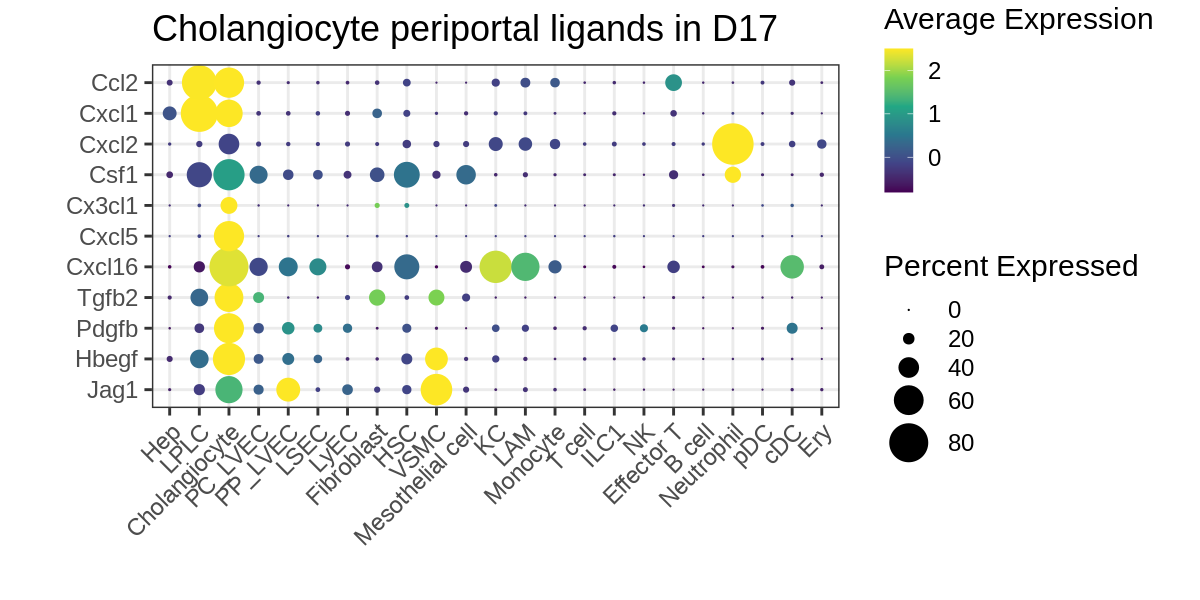

In [37]:
# environment in Fig.3d.
gene=unique(c("Ccl2","Cxcl1","Cxcl2","Csf1","Cx3cl1","Cxcl2","Cxcl5","Cxcl16","Tgfb2","Pdgfb","Hbegf","Jag1"))
options(repr.plot.width=10, repr.plot.height=5)
p=DotPlot(D17,features=rev(gene),dot.scale=11)+scale_y_discrete("")+scale_x_discrete("")+coord_flip()
p1=p+theme(panel.grid=element_blank())+theme_bw(base_size = 18)+RotatedAxis()+
  scale_color_viridis_c()+labs(x=NULL,y=NULL)+ggtitle('Cholangiocyte periportal ligands in D17')+theme(aspect.ratio=0.5)
plot(p1)

## Fig.3i

In [38]:
library("Seurat")
library("dplyr")
library("ggplot2")
library(patchwork)
library(viridis)
data <- domaindata

In [39]:
layerCounterByTime_niche <- function(obj, ligands) {
  require("Seurat")
  require("dplyr")
  
  # layerCounts 
  layerCounts <- function(obj.dat, pre) {
    if (missing(pre)) {
      pre <- ""
    }
    n=2
    for (i in unique(obj.dat$annotation_macro) %>%
         sort()) {
      tmp.dat <- subset(obj.dat, subset = annotation_macro == i)
      if (i == sort(unique(obj.dat$annotation_macro))[1]) {
        df <- apply(tmp.dat@assays$RNA@data, 1, mean) %>%
          as.data.frame(row.names = 1)
        colnames(df)[1] <- paste0(pre, "_domain_", i)
      } else {
        df[, n] <- apply(tmp.dat@assays$RNA@data, 1, mean)
        colnames(df)[n] <- paste0(pre, "_domain_", i)
        n=n+1
      }
    }
    return(df)
  }
  
  dat.ligands <- subset(obj, features = ligands)
  dat.ligands <- subset(dat.ligands, subset = annotation_macro %in% c("Hepa-domain","LPLC-domain","Chol-domain","Portal vein-area"))
  
  # time point
  time <- dat.ligands$time %>%
    unique() %>%
    sort()
  
  for (t in time) {
    # extract by time
    time.dat <- subset(dat.ligands, subset = time == t)
    if (t == time[1]) {
      df <- layerCounts(time.dat, t)
    } else {
      df_t <- layerCounts(time.dat, t)
      df <- cbind(df, df_t)
    }
  }
  
  anno_col <- data.frame(time = rep(time, each = 4))
  row.names(anno_col) <- colnames(df)
  return(list(df = df, anno_col = anno_col))
}

In [40]:
gene=c("Csf1")
info=layerCounterByTime_niche(data,gene)

# select the D0, D8 and D17 time points
info_gene=info$df[,c(1,3,5,6,7,9,10,11)]
info_gene

,D0_domain_Hepa-domain,D0_domain_Chol-domain,D8_domain_Hepa-domain,D8_domain_LPLC-domain,D8_domain_Chol-domain,D17_domain_Hepa-domain,D17_domain_LPLC-domain,D17_domain_Chol-domain
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Csf1,0.02713766,0.04450445,0.04164792,0.06713023,0.09741106,0.05396325,0.09870911,0.1899169


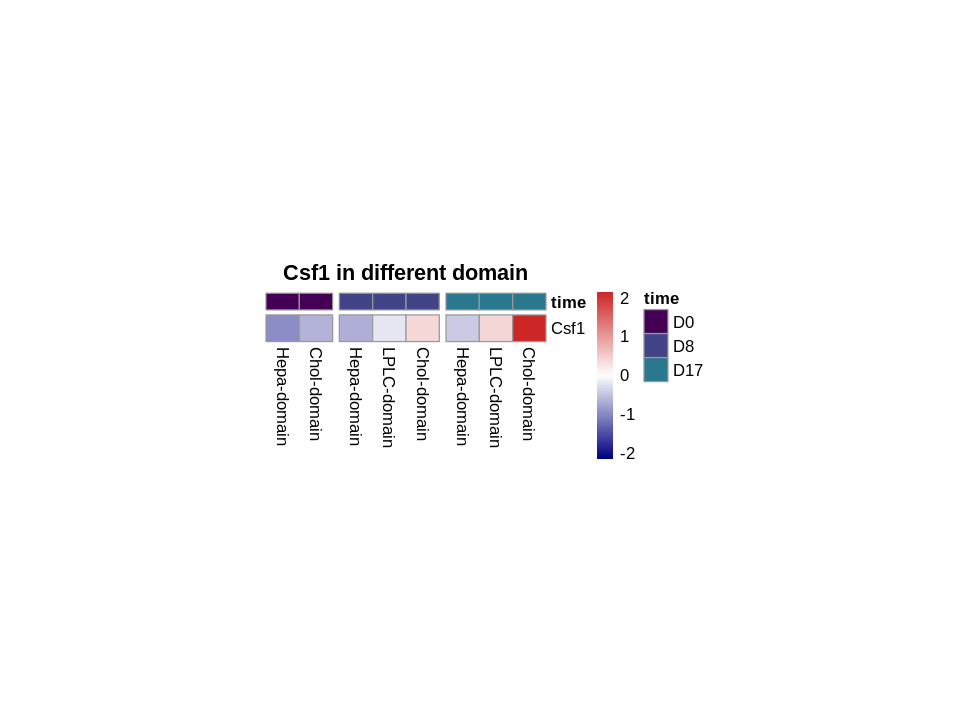

In [41]:
options(repr.plot.width = 8, repr.plot.height = 6)
ann_colors = list(time = c(D0="#440154FF",D8= "#414487FF",D17="#2A788EFF")) 
annotation_col=data.frame(time = factor(c(rep("D0",2),rep("D8",3),rep("D17",3)),
                                        levels=c("D0","D8","D17")), row.names = colnames(info_gene))
p=pheatmap::pheatmap(info_gene, show_colnames = T, scale = "row",
                      gaps_col = c(2,5),
                      labels_col = c("Hepa-domain","Chol-domain",rep(c("Hepa-domain","LPLC-domain","Chol-domain"),2)),  
                      cluster_rows =F,annotation_colors=ann_colors,
                      cluster_cols = F, annotation_col = annotation_col, color = colorRampPalette(c("navy",
                                                                                                    "white", "firebrick3"))(200),cellheight = 16,cellwidth = 20,fontsize = 10,main="Csf1 in different domain")

# Fig4 

## Fig.4a

In [42]:
library("Seurat")
library("dplyr")
library("ggplot2")
library("ggpubr")
data <- scdata

In [43]:
data$anno_LPLCsubtype2=data$anno_LPLCsubtype
data$anno_LPLCsubtype2=as.character(data$anno_LPLCsubtype2)
data$anno_LPLCsubtype2[data$anno_LPLCsubtype2 %in% c("LAM","cDC","KC","Monocyte","LSEC","PC_LVEC","PP_LVEC","HSC","Effector T","B cell","T cell","Mesothelial cell","pDC","NK","ILC1","Fibroblast","Ery","VSMC","Neutrophil","LyEC")]="gray"
data$anno_LPLCsubtype2=factor(data$anno_LPLCsubtype2,levels=c("Hep","Proliferating hep","LPLC_1","LPLC_2","Cholangiocyte","gray"))

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



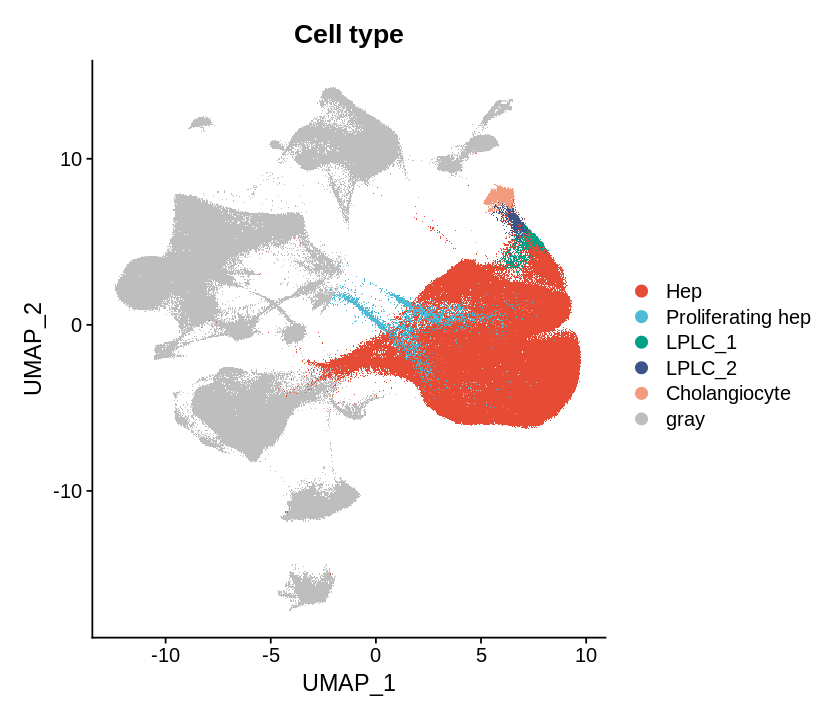

In [44]:
theme_set(theme_bw(base_size = 15))
col=c('#E64B35FF','#4DBBD5FF','#00A087FF','#3C5488FF','#F39B7FFF','gray')
options(repr.plot.width=7, repr.plot.height=6)
p <- DimPlot(data, reduction = "umap",label = F, repel = T,group.by = "anno_LPLCsubtype2",cols=col)+ggtitle("Cell type")
p

## Fig.4b

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



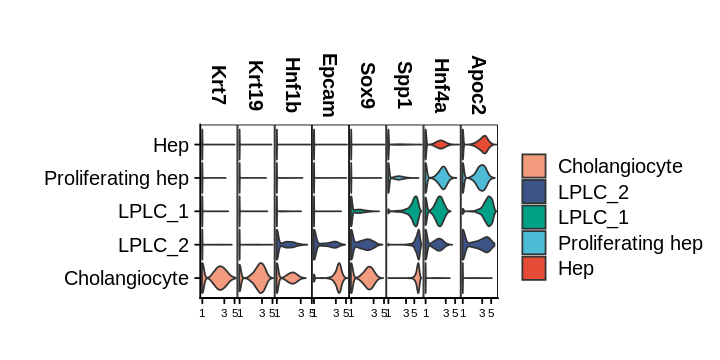

In [45]:
# environment in Fig.4a.
library(ggsci)
Idents(data)="anno_LPLCsubtype"
HepChol=subset(data,idents= c("Hep","Proliferating hep","LPLC_1","LPLC_2","Cholangiocyte"))
HepChol$anno_LPLCsubtype=factor(HepChol$anno_LPLCsubtype,levels=rev(c("Hep","Proliferating hep","LPLC_1","LPLC_2","Cholangiocyte")))

options(repr.plot.width=6, repr.plot.height=3)
col=rev(c('#E64B35FF','#4DBBD5FF','#00A087FF','#3C5488FF','#F39B7FFF'))
p=VlnPlot(HepChol, features = rev(c("Apoc2","Hnf4a","Spp1","Sox9","Epcam","Hnf1b","Krt19","Krt7")),stack = T,
          group.by="anno_LPLCsubtype",log = TRUE,pt.size=0,fill.by='ident',col=col)+xlab("") + ylab("") + ggtitle("") +scale_color_npg()
p

## Fig.4d

In [46]:
library("Seurat")
library("dplyr")
library("ggplot2")
data <- scdata

In [47]:
Idents(data)="anno_LPLCsubtype"
HepChol=subset(data,idents= c("Hep","Proliferating hep","LPLC_1","LPLC_2","Cholangiocyte"))

In [48]:
HepChol$anno_LPLCsubtype2=HepChol$anno_LPLCsubtype
HepChol$anno_LPLCsubtype2[HepChol$anno_LPLCsubtype %in% c("Proliferating hep")]="Hep"

In [49]:
Idents(HepChol)="anno_LPLCsubtype2"

In [50]:
library(monocle)
set.seed(42)
subobj <- subset(HepChol, downsample = 22000) #downsampling
table(subobj@active.ident)
table(subobj@active.ident) %>% sum

Loading required package: Matrix

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,



          Hep        LPLC_1        LPLC_2 Cholangiocyte 
        22000          2477          1766          3755 

[1] 29998

In [51]:
data2 <- as(as.matrix(subobj@assays$RNA@data), 'sparseMatrix')
pd <- new('AnnotatedDataFrame', data = subobj@meta.data)
fData <- data.frame(gene_short_name = row.names(data2), row.names = row.names(data2))
fd <- new('AnnotatedDataFrame', data = fData)

In [52]:
#Construct monocle cds
monocle_cds <- newCellDataSet(data2,
                              phenoData = pd,
                              featureData = fd,
                              lowerDetectionLimit = 0.5,
                              expressionFamily = negbinomial.size())
monocle_cds
monocle_cds <- estimateSizeFactors(monocle_cds)
monocle_cds <- estimateDispersions(monocle_cds)

CellDataSet (storageMode: environment)
assayData: 49978 features, 29998 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: R21_H1_M2_batch8_CELL3580_N1
    R21_H1_M2_batch8_CELL1511_N1 ... New_R7_H2_CELL1407_N1 (29998
    total)
  varLabels: lib time ... Size_Factor (12 total)
  varMetadata: labelDescription
featureData
  featureNames: Cox7a2 Syf2 ... AC110556.1 (49978 total)
  fvarLabels: gene_short_name
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
Annotation:  

Removing 901 outliers



In [53]:
deg.cluster=read.csv("/sibcb1/huilijianlab1/wubohua/R/BGI_20211223/scRNA-seq_20220403/subtype/HepChol_monocle/findmarker_anno.fig3_LPLCsubcluster_delHep_div_wilcox_20220422.csv")
# Table focusing on Hepatocyte differentiation, without the specific genes of proliferating hep.
express_genes <- unique(deg.cluster$gene)
express_genes %>% length

[1] 3814

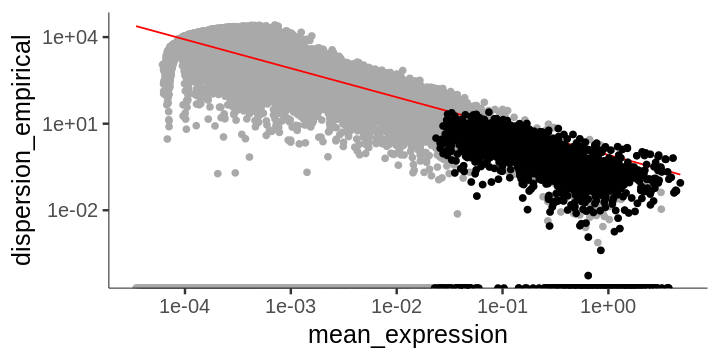

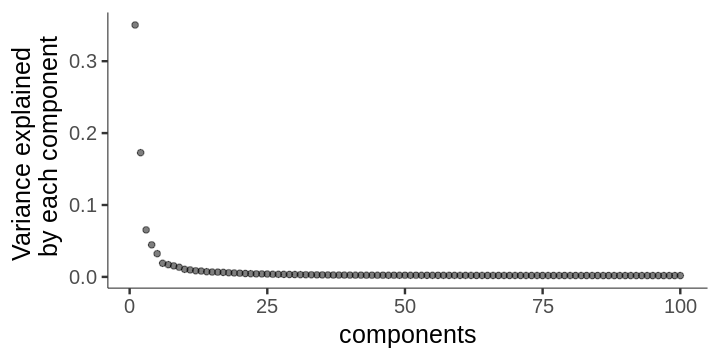

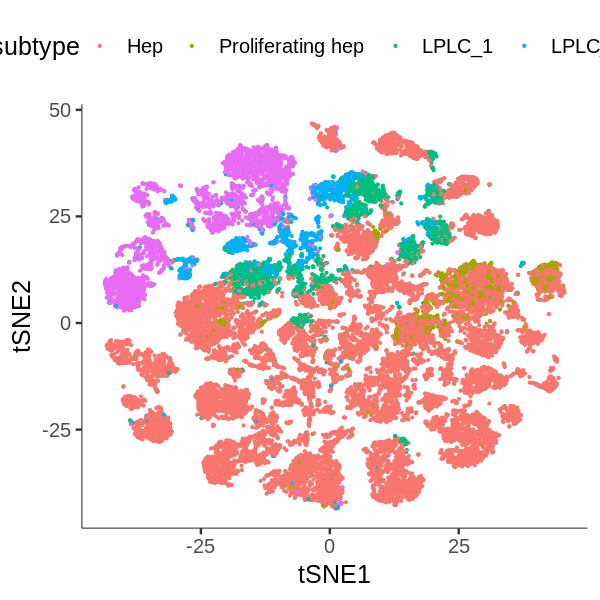

In [54]:
monocle_cds <- setOrderingFilter(monocle_cds, express_genes)
plot_ordering_genes(monocle_cds)
# Plots the percentage of variance explained by the each component based on PCA from the normalized expression data using the same procedure used in reduceDimension function.
# HSMM@auxClusteringData[["tSNE"]]$variance_explained <- NULL
plot_pc_variance_explained(monocle_cds, return_all = F) # norm_method='log'
options(repr.plot.width = 5, repr.plot.height = 12)
monocle_cds <- reduceDimension(monocle_cds, num_dim = 25, reduction_method = 'tSNE')
monocle_cds <- clusterCells(monocle_cds, method = "louvain", num_clusters = 10)
options(repr.plot.width = 5, repr.plot.height = 5)
p1=plot_cell_clusters(monocle_cds, cell_size = 0.5,color_by = "anno_LPLCsubtype") +
  labs(x = "tSNE1", y = "tSNE2")
p1

In [55]:
monocle_cds <- reduceDimension(monocle_cds, max_components = 2,
    method = 'DDRTree')

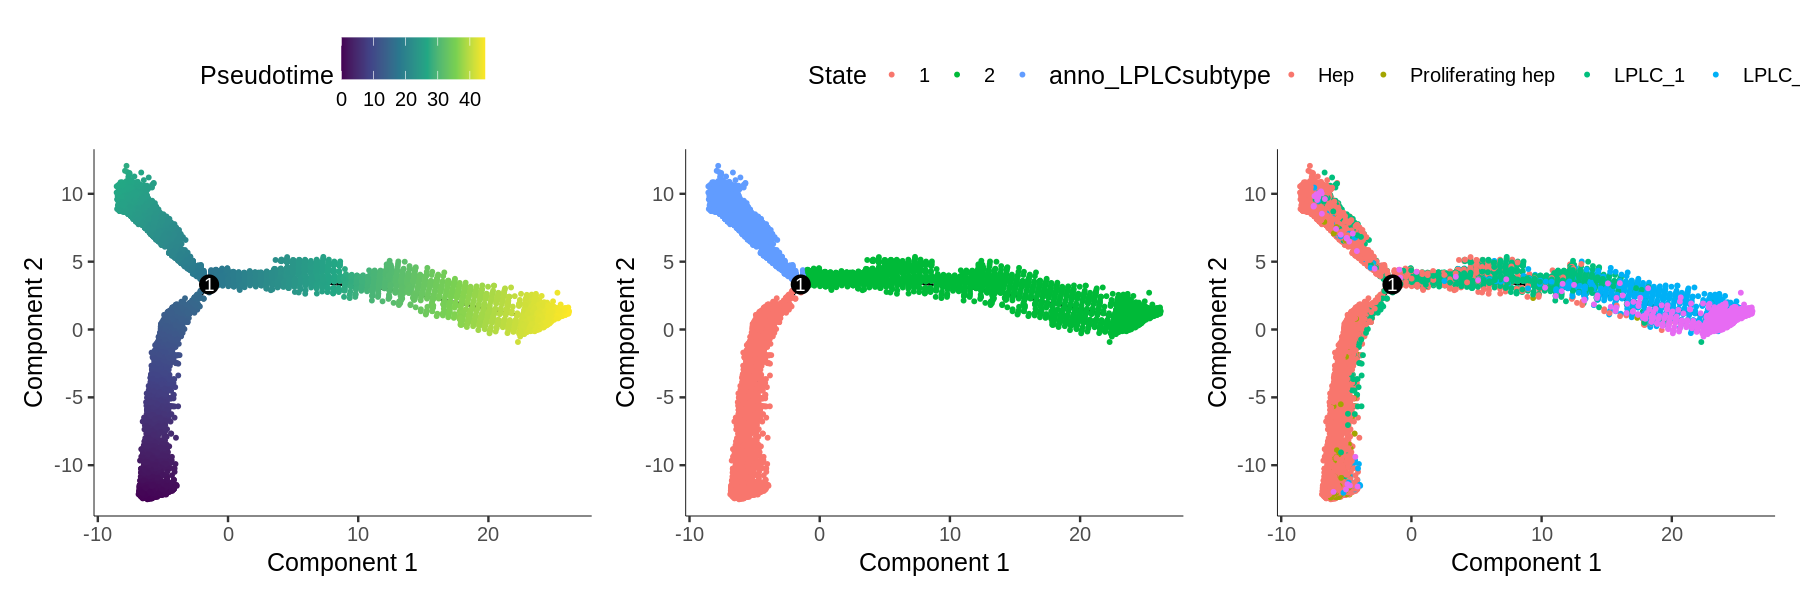

In [56]:
monocle_cds <- orderCells(monocle_cds)
p1=plot_cell_trajectory(monocle_cds, color_by = "Pseudotime", cell_size = 1) +
  scale_color_viridis_c()
p2=plot_cell_trajectory(monocle_cds, color_by = "State", cell_size = 1) 
p3=plot_cell_trajectory(monocle_cds, color_by = "anno_LPLCsubtype", cell_size = 1) 
options(repr.plot.width = 15, repr.plot.height = 5)
p1+p2+p3

In [57]:
monocle_cds_2 <- orderCells(monocle_cds, root_state = 3)
# because it was reported that LPLC was reprogramming from hepatocytes during DDC injury, we set state 2 (hepatocyte population) as root.

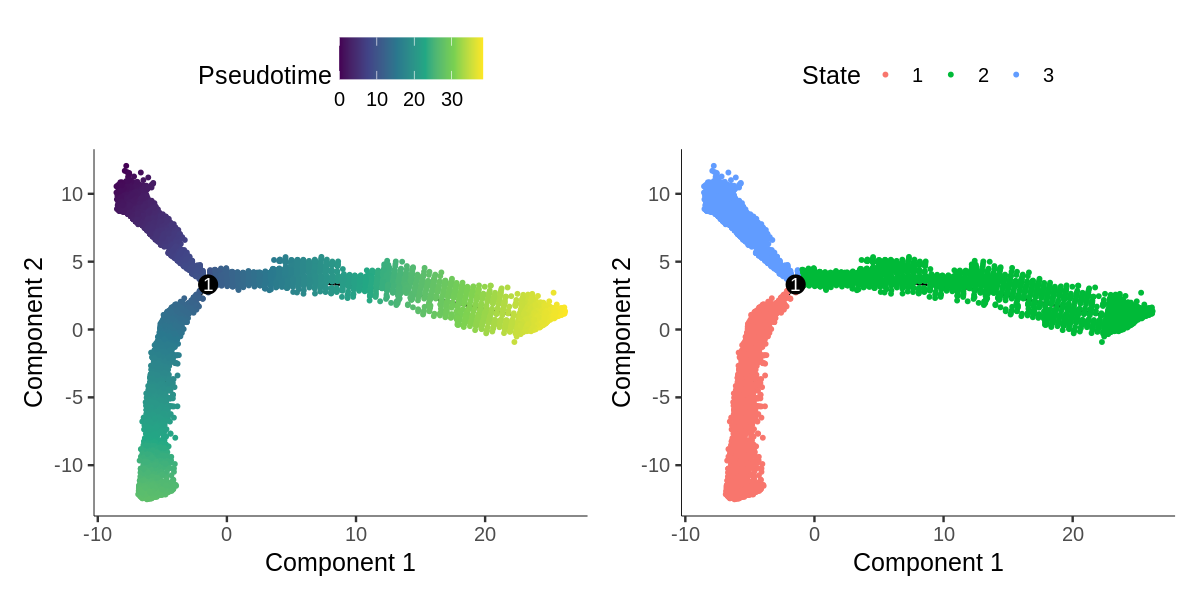

In [58]:
options(repr.plot.width = 10, repr.plot.height = 5)
p1=plot_cell_trajectory(monocle_cds_2, color_by = "Pseudotime", cell_size = 1) +
  scale_color_viridis_c()
p2=plot_cell_trajectory(monocle_cds_2, color_by = "State", cell_size = 1) 
p1+p2

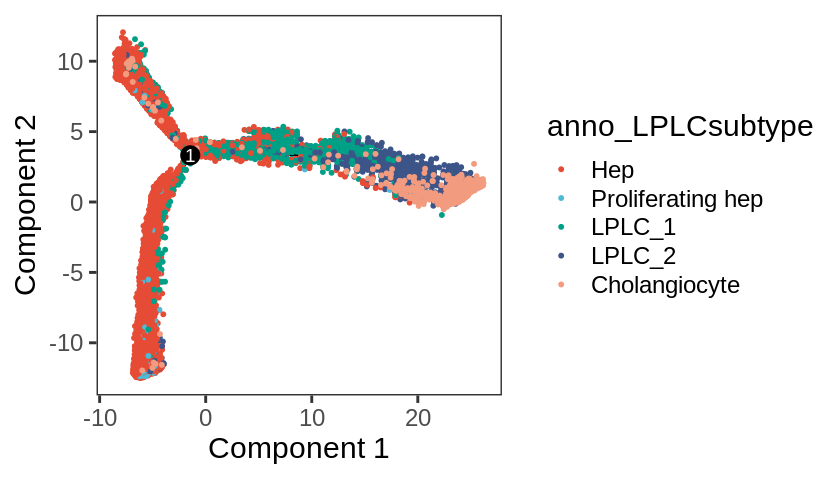

In [59]:
options(repr.plot.width = 7, repr.plot.height = 4)
p3=plot_cell_trajectory(monocle_cds_2, color_by = "anno_LPLCsubtype", cell_size = 1,order="anno_LPLCsubtype") +theme_bw(base_size = 18)+
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank())+
  scale_color_manual(values=c('#E64B35FF','#4DBBD5FF','#00A087FF','#3C5488FF','#F39B7FFF'))
p3

Picking joint bandwidth of 0.873



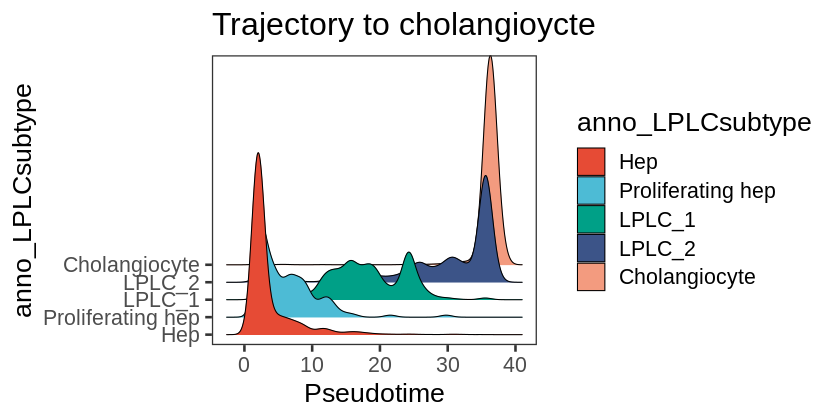

In [60]:
# export the density of each population across pseudotime (differentiation into Cholangiocyte).
monometa=pData(monocle_cds_2)
ToChol=filter(monometa,State %in% c("3","2"))
library(ggsci)
library(ggplot2)
library(ggridges)
options(repr.plot.width = 7, repr.plot.height = 3.5)
p=ggplot(data=ToChol, aes(x=Pseudotime, y=anno_LPLCsubtype)) +
  geom_density_ridges_gradient(aes(fill = `anno_LPLCsubtype`), scale =12, size = 0.3) +  theme(legend.position = "none")+
  theme_bw(base_size = 16)+
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank())+ggtitle("Trajectory to cholangioycte")+
  scale_fill_manual(values=c('#E64B35FF','#4DBBD5FF','#00A087FF','#3C5488FF','#F39B7FFF'))
p

## Fig.4g

In [61]:
library("Seurat")
library("dplyr")
library("ggplot2")
domain_downsampling <- readRDS("/sibcb1/huilijianlab1/wubohua/R/BGI_20211223/Rscript/data/DDC_domain_representative_slides_20220804.rds")
# using the dataset including representative sections (DY1_D0, FS1_D8, FS4_D17, FS5_R2 and FR8_R7).

In [62]:
data=domain_downsampling
Idents(data)="sub.cluster"
data2=subset(data,idents=c("Hepa-domain","LPLC-domain1","LPLC-domain2","Chol-domain"))
set.seed(42)
subobj <- subset(data2, downsample = 8000) #downsampling
table(subobj@active.ident)
table(subobj@active.ident) %>% sum


 Hepa-domain LPLC-domain1 LPLC-domain2  Chol-domain 
        8000         8000         4623         5210 

[1] 25833

In [63]:
library(monocle)
data2 <- as(as.matrix(subobj@assays$Spatial@data), 'sparseMatrix')
pd <- new('AnnotatedDataFrame', data = subobj@meta.data)
fData <- data.frame(gene_short_name = row.names(data2), row.names = row.names(data2))
fd <- new('AnnotatedDataFrame', data = fData)
#Construct monocle cds
monocle_cds <- newCellDataSet(data2,
                              phenoData = pd,
                              featureData = fd,
                              lowerDetectionLimit = 0.5,
                              expressionFamily = negbinomial.size())
monocle_cds
monocle_cds <- estimateSizeFactors(monocle_cds)
monocle_cds <- estimateDispersions(monocle_cds)

CellDataSet (storageMode: environment)
assayData: 26830 features, 25833 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: BIN.52834_1 BIN.52838_1 ... BIN.45331_5 (25833 total)
  varLabels: orig.ident nCount_Spatial ... Size_Factor (9 total)
  varMetadata: labelDescription
featureData
  featureNames: Cr2 Cr1l ... AC164084.2 (26830 total)
  fvarLabels: gene_short_name
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
Annotation:  

Removing 721 outliers



In [64]:
deg.cluster=read.csv("/sibcb1/huilijianlab1/wubohua/R/BGI/spatial_data_20211129/heatmap/trajectory/4.findallmarker_annotated_LPLCsubmergesubtyes_delPVafteranalysis_wilcox_20220824.csv") #Domain DEG genes, without the specific genes of Portal vein-area.
express_genes <- unique(deg.cluster$gene)
express_genes %>% length

[1] 1481

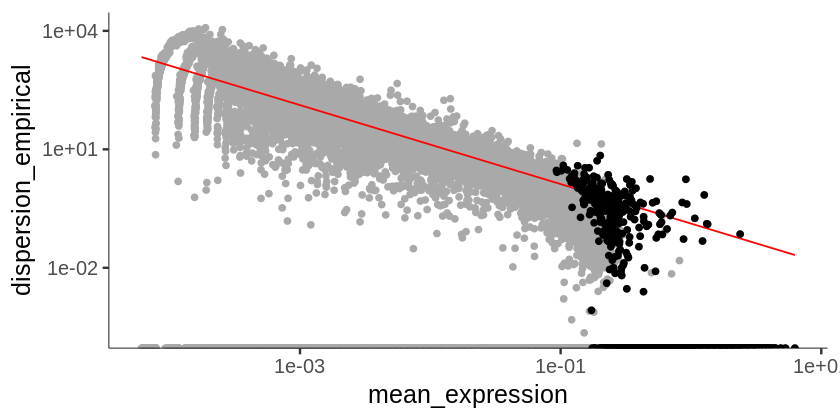

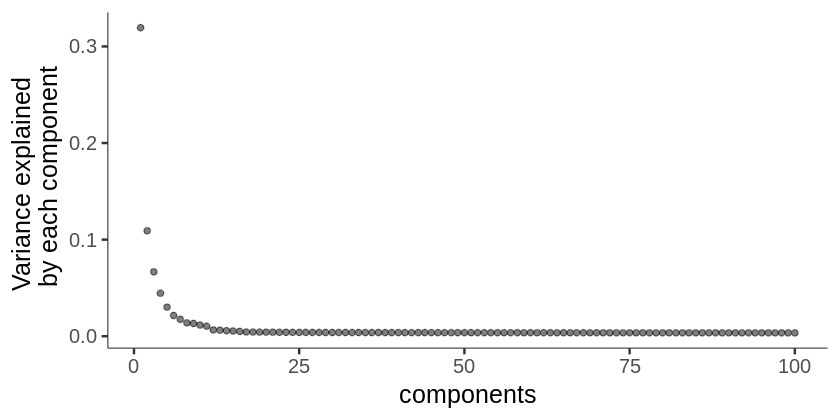

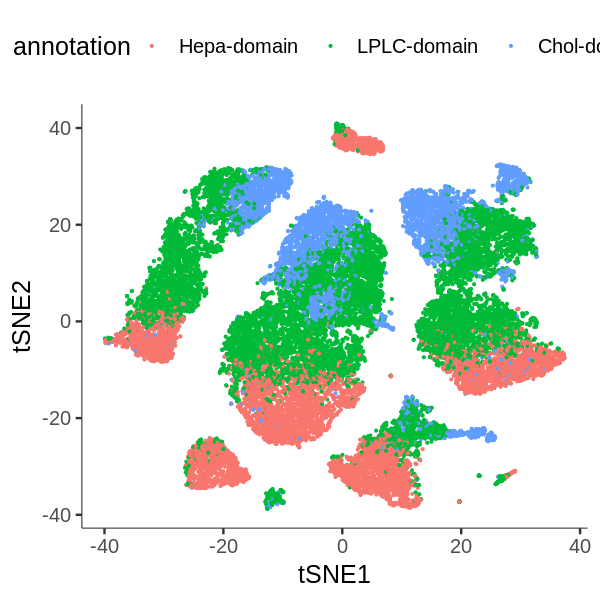

In [65]:
monocle_cds <- setOrderingFilter(monocle_cds, express_genes)
plot_ordering_genes(monocle_cds)
plot_pc_variance_explained(monocle_cds, return_all = F) # norm_method='log'
options(repr.plot.width = 5, repr.plot.height = 12)
monocle_cds <- reduceDimension(monocle_cds, num_dim = 25, reduction_method = 'tSNE')
monocle_cds <- clusterCells(monocle_cds, method = "louvain", num_clusters = 10)
options(repr.plot.width = 5, repr.plot.height = 5)
p1=plot_cell_clusters(monocle_cds, cell_size = 0.5,color_by = "annotation") +
  labs(x = "tSNE1", y = "tSNE2")
p1

In [66]:
monocle_cds <- reduceDimension(monocle_cds, max_components = 2,
                               method = 'DDRTree')
monocle_cds <- orderCells(monocle_cds)
monocle_cds <- orderCells(monocle_cds, root_state = 1) # take state 1 (hepa-domain) as root.

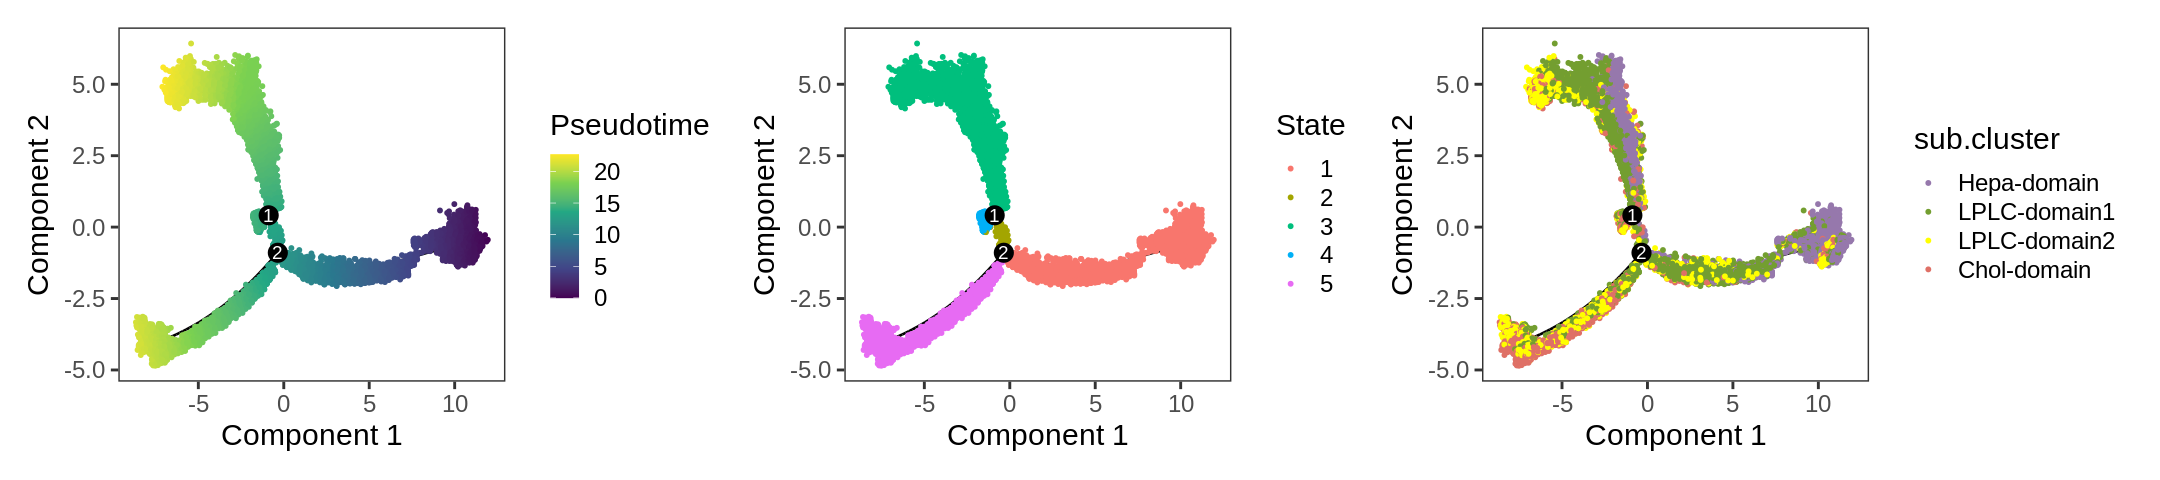

In [67]:
p1=plot_cell_trajectory(monocle_cds, color_by = "Pseudotime", cell_size = 1) +
  scale_color_viridis_c()+theme_bw(base_size = 18)+
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())
p2=plot_cell_trajectory(monocle_cds, color_by = "State", cell_size = 1) +theme_bw(base_size = 18)+
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank())
p3=plot_cell_trajectory(monocle_cds, color_by = "sub.cluster", cell_size = 1) +theme_bw(base_size = 18)+
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank())+
  scale_color_manual(values=c('#9678AC','#739E30','#FFFF00','#DF7066'))
options(repr.plot.width = 18, repr.plot.height = 4)
P=p1+p2+p3
P

Picking joint bandwidth of 0.679



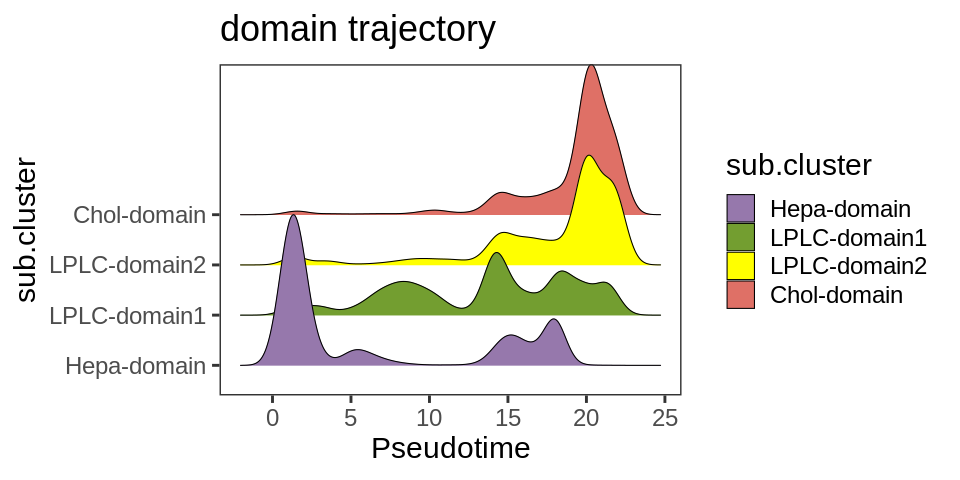

In [68]:
# export the density of each domain across pseudotime (differentiation into Cholangiocyte).
monometa=pData(monocle_cds)
monometa$sub.cluster=factor(monometa$sub.cluster,levels=c("Hepa-domain","LPLC-domain1","LPLC-domain2","Chol-domain"))

library(ggplot2)
library(ggridges)
options(repr.plot.width = 8, repr.plot.height = 4)
p1=ggplot(data=monometa, aes(x=Pseudotime, y=sub.cluster)) +
  geom_density_ridges_gradient(aes(fill = `sub.cluster`), scale = 3, size = 0.3) +  theme(legend.position = "none")+
  theme_bw(base_size = 18)+
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank())+
  scale_fill_manual(values=c('#9678AC','#739E30','#FFFF00','#DF7066'))+ggtitle("domain trajectory")
p1

## Fig.4h

In [69]:
library("Seurat")
library("dplyr")
library("ggplot2")
library(patchwork)
library(viridis)
data=domaindata

In [70]:
data_select2=subset(data,subset=annotation=="Portal vein-area",invert=T)
data_select2$annotation=factor(data_select2$annotation,levels=rev(c("Hepa-domain","LPLC-domain1","LPLC-domain2","Chol-domain")))

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



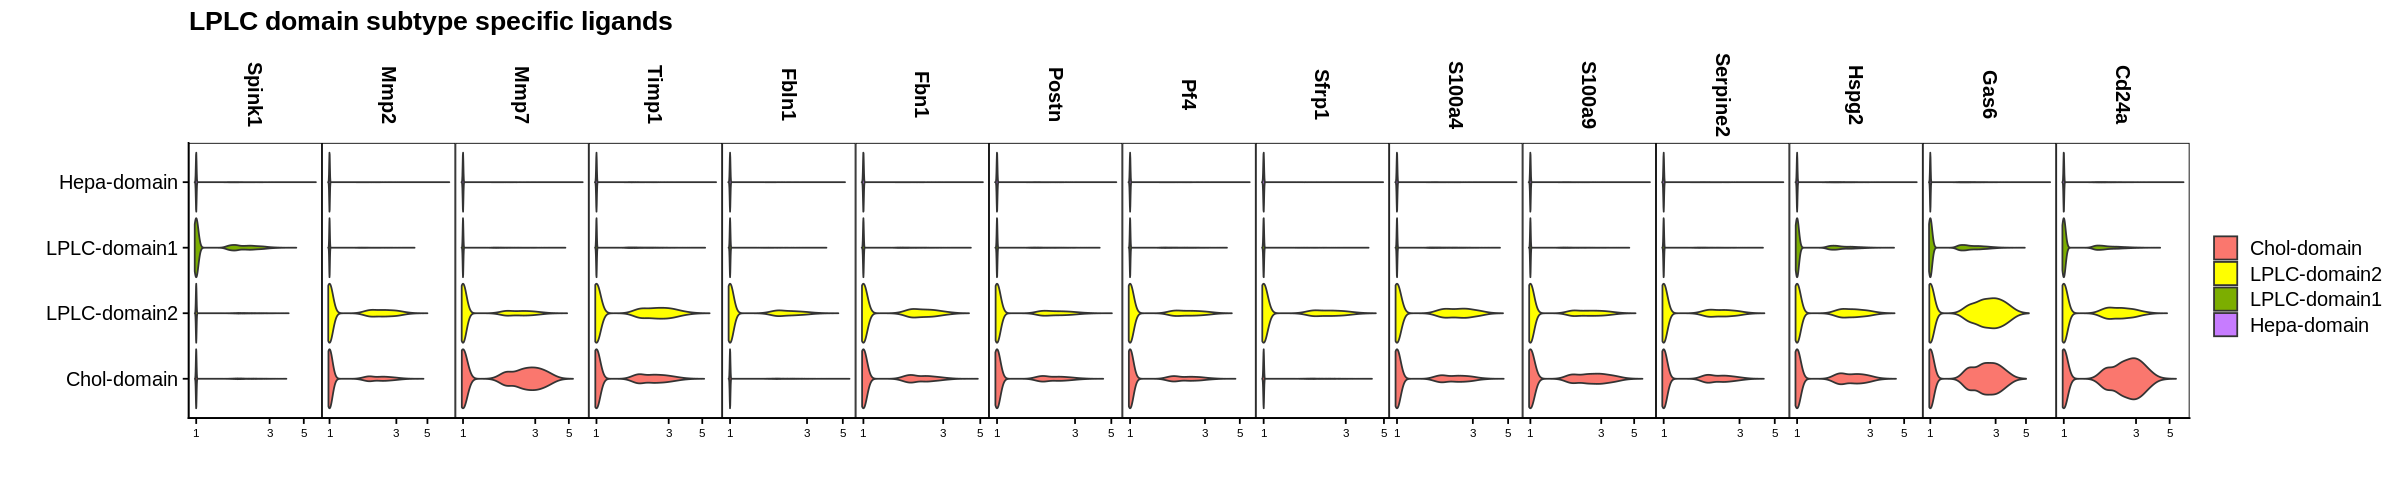

In [71]:
gene=c('Spink1','Mmp2','Mmp7','Timp1','Fbln1','Fbn1','Postn','Pf4','Sfrp1','S100a4','S100a9','Serpine2','Hspg2','Gas6','Cd24a')
options(repr.plot.width=20, repr.plot.height=4)
p1=VlnPlot(data_select2, features =gene,group.by="annotation",stack = T,
           log = TRUE,pt.size=0,fill.by='ident',cols=rev(c("#c77cff","#7CAE00","#ffff00","#fa776e")))+xlab("") + ylab("") + ggtitle("LPLC domain subtype specific ligands") 
p1

## Fig.4j

In [72]:
# environment in Fig.4h.
# draw by niche
featureModule_niche <- function(timelist, feature_list) {
  meta <- data@meta.data
  meta <- meta[meta$time == timelist, c("annotation", feature_list)]
  
  res.df <- matrix(rep(0, 5*length(feature_list)), nrow = 5) %>% as.data.frame()
  rownames(res.df) <- c("Hepa-domain","LPLC-domain1","LPLC-domain2","Chol-domain","Portal vein-area")
  colnames(res.df) <- feature_list
  for (i in c("Hepa-domain","LPLC-domain1","LPLC-domain2","Chol-domain","Portal vein-area")) {
    meta.layer <- meta[meta$annotation == i,]
    res.df[i,] <- apply(meta.layer[,feature_list, drop=F], 2, mean)
  }
  res.df <- t(res.df) %>% as.data.frame()
  colnames(res.df) <- paste0(timelist, "_", colnames(res.df))
  rownames(res.df) <- names(feature_list)
  return(res.df)
}
pathways <- c('Notch1','TGFbwiki1')
names(pathways) <- pathways

In [73]:
for (i in c("D0","D8","D17")) {
  if (i == "D0") {
    pathways.df <- featureModule_niche(i, pathways)
  } else {
    t.df <- featureModule_niche(i, pathways)
    pathways.df <- cbind(pathways.df, t.df)
  }
}; rm(t.df)

In [74]:
info=pathways.df[2,c(1,4,6:9,11:14)] 
info
row.names(info)="TGFb signaling"

,D0_Hepa-domain,D0_Chol-domain,D8_Hepa-domain,D8_LPLC-domain1,D8_LPLC-domain2,D8_Chol-domain,D17_Hepa-domain,D17_LPLC-domain1,D17_LPLC-domain2,D17_Chol-domain
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TGFbwiki1,-0.05965276,0.0246612,-0.034881,-0.02428232,0.05266089,0.04991581,-0.007082278,0.02633091,0.07999202,0.08788173


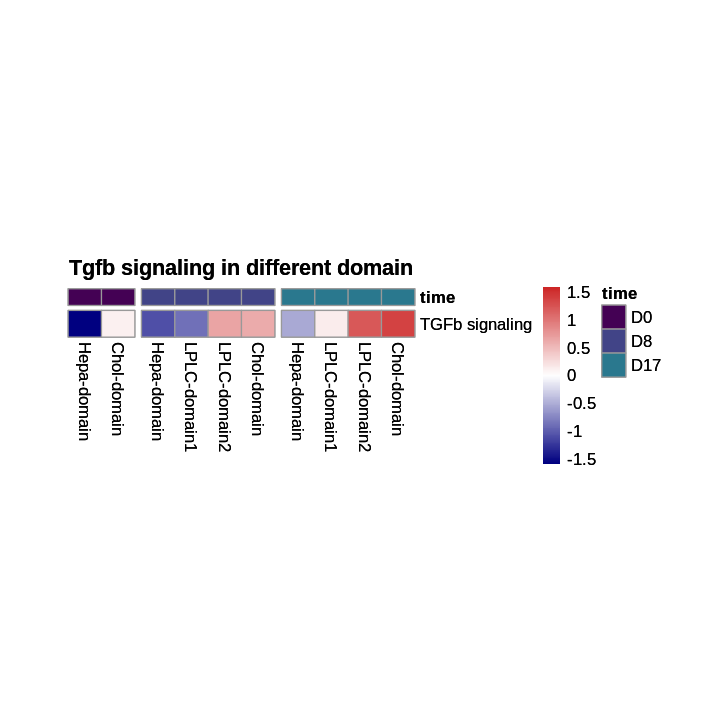

In [75]:
options(repr.plot.width = 6, repr.plot.height = 6)
ann_colors = list(time = c(D0="#440154FF",D8= "#414487FF",D17="#2A788EFF")) 
annotation_col=data.frame(time = factor(c(rep("D0",2),rep("D8",4),rep("D17",4)),
                                        levels=c("D0","D8","D17")), row.names = colnames(info))
p=pheatmap::pheatmap(info, show_colnames = T, scale = "row",
                     gaps_col = c(2,6),
                     labels_col = c("Hepa-domain","Chol-domain",rep(c("Hepa-domain","LPLC-domain1","LPLC-domain2","Chol-domain"),2)),  
                     cluster_rows =F,annotation_colors=ann_colors,
                     cluster_cols = F, annotation_col = annotation_col, color = colorRampPalette(c("navy",
                                                                                                   "white", "firebrick3"))(200),cellheight = 16,cellwidth = 20,fontsize = 10,main="Tgfb signaling in different domain")
p

## Fig.4k

In [76]:
data_select2$annotation=factor(data_select2$annotation,levels=c("Hepa-domain","LPLC-domain1","LPLC-domain2","Chol-domain"))

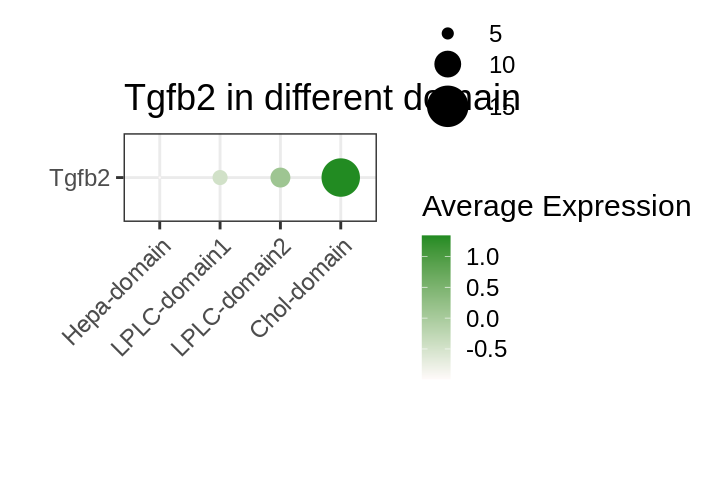

In [77]:
## environment in Fig.4h.
gene=c("Tgfb2")
options(repr.plot.width=6, repr.plot.height=4)
p=DotPlot(data_select2,features=gene,dot.scale=11,cols = c("Snow", "#228B22"),group.by="annotation",scale.max=15)+scale_y_discrete("")+scale_x_discrete("")+coord_flip()
p2=p+theme(panel.grid=element_blank())+theme_bw(base_size = 18)+RotatedAxis()+labs(x=NULL,y=NULL)+ggtitle("Tgfb2 in different domain")+theme(aspect.ratio=0.35)
plot(p2)

# Fig.5

## Fig.5a

In [78]:
library("Seurat")
library("dplyr")
library("ggplot2")
library(patchwork)
library(viridis)
data=spatialdata

In [79]:
# draw by layers
featureModule <- function(timelist, feature_list) {
  meta <- data@meta.data
  meta <- meta[meta$time == timelist, c("rank", feature_list)]
  
  res.df <- matrix(rep(0, 9*length(feature_list)), nrow = 9) %>% as.data.frame()
  rownames(res.df) <- c(1:9); colnames(res.df) <- feature_list
  for (i in c(1:9)) {
    meta.layer <- meta[meta$rank == i,]
    res.df[i,] <- apply(meta.layer[,feature_list, drop=F], 2, mean)
  }
  res.df <- t(res.df) %>% as.data.frame()
  colnames(res.df) <- paste0(timelist, "_layer", colnames(res.df))
  rownames(res.df) <- names(feature_list)
  return(res.df)
}
pathways <- c("Monocyte","LAM","Neutrophil","Cholangiocyte","Fibroblast")
names(pathways) <- pathways

In [80]:
for (i in c("D0","D8","D17","R2","R7","R21")) {
  if (i == "D0") {
    pathways.df <- featureModule(i, pathways)
  } else {
    t.df <- featureModule(i, pathways)
    pathways.df <- cbind(pathways.df, t.df)
  }
}; rm(t.df)

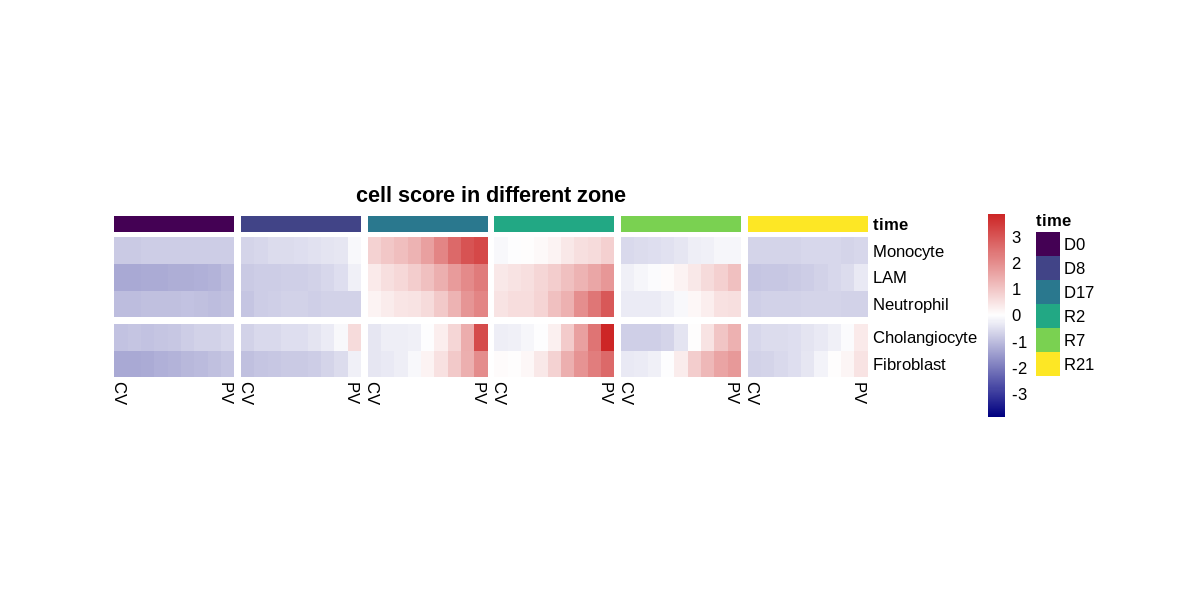

In [81]:
pathways.dfa=pathways.df
options(repr.plot.width = 10, repr.plot.height = 5)
ann_colors = list(time = c(D0="#440154FF",D8= "#414487FF",D17="#2A788EFF", R2="#22A884FF",R7="#7AD151FF", R21="#FDE725FF"))
annotation_col=data.frame(time = factor(rep(c("D0","D8","D17","R2","R7","R21"),each = 9),levels=c("D0","D8","D17","R2","R7","R21")), row.names = colnames(pathways.dfa))
map=pheatmap::pheatmap(pathways.dfa, show_rownames = T, scale = "row", gaps_col = c(9,18,27,36,45), gaps_row = c(3),
                       labels_col = rep(c("CV", rep("", 7),"PV"), 6), annotation_colors=ann_colors,
                       cluster_rows =F,annotation_col = annotation_col, border_color=NA, 
                       cluster_cols = F,cellheight = 16,cellwidth = 8,fontsize = 10, color = colorRampPalette(c("navy",
                                                                                                                "white", "firebrick3"))(200),main="cell score in different zone")

## Fig.5c

In [82]:
## environment in Fig.5a.
# draw by layers
featureModule <- function(timelist, feature_list) {
  meta <- data@meta.data
  meta <- meta[meta$time == timelist, c("rank", feature_list)]
  
  res.df <- matrix(rep(0, 9*length(feature_list)), nrow = 9) %>% as.data.frame()
  rownames(res.df) <- c(1:9); colnames(res.df) <- feature_list
  for (i in c(1:9)) {
    meta.layer <- meta[meta$rank == i,]
    res.df[i,] <- apply(meta.layer[,feature_list, drop=F], 2, mean)
  }
  res.df <- t(res.df) %>% as.data.frame()
  colnames(res.df) <- paste0(timelist, "_layer", colnames(res.df))
  rownames(res.df) <- names(feature_list)
  return(res.df)
}
pathways <- c("DAMP","Oxidative_stress","DNA_damage","Cellular_senescence","Inflammation","ECM_organization")
names(pathways) <- pathways

In [83]:
for (i in c("D0","D8","D17","R2","R7","R21")) {
  if (i == "D0") {
    pathways.df <- featureModule(i, pathways)
  } else {
    t.df <- featureModule(i, pathways)
    pathways.df <- cbind(pathways.df, t.df)
  }
}; rm(t.df)

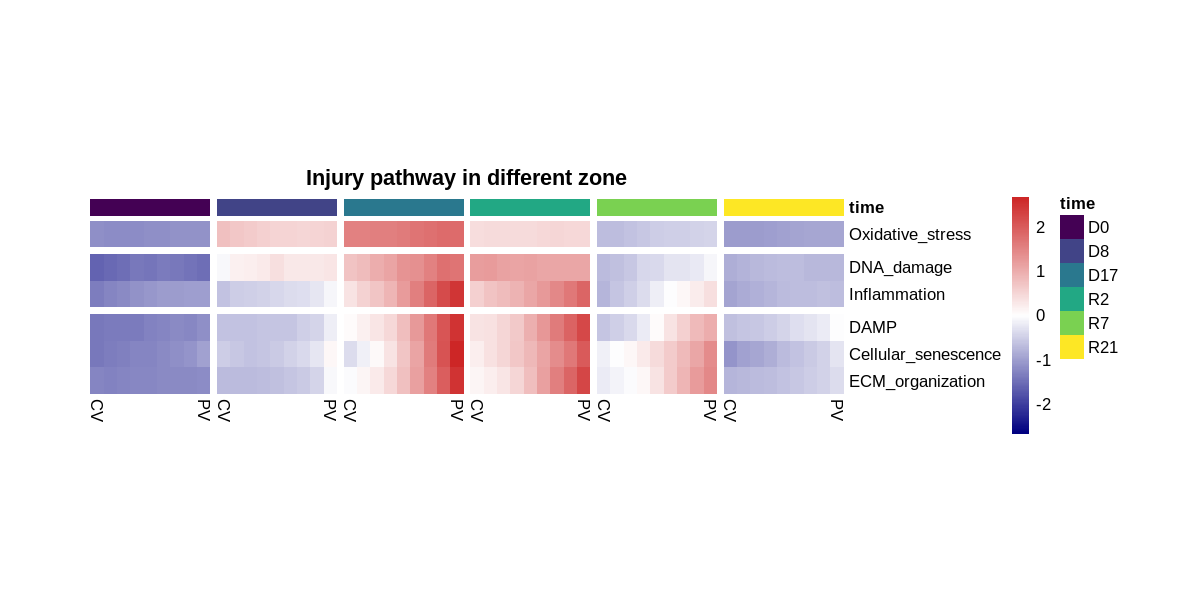

In [84]:
pathways.dfa=pathways.df
options(repr.plot.width = 10, repr.plot.height = 5)
ann_colors = list(time = c(D0="#440154FF",D8= "#414487FF",D17="#2A788EFF", R2="#22A884FF",R7="#7AD151FF", R21="#FDE725FF"))
annotation_col=data.frame(time = factor(rep(c("D0","D8","D17","R2","R7","R21"),each = 9),levels=c("D0","D8","D17","R2","R7","R21")), row.names = colnames(pathways.dfa))
map=pheatmap::pheatmap(pathways.dfa[c(2,3,5,1,4,6),], show_rownames = T, scale = "row", gaps_col = c(9,18,27,36,45), gaps_row=c(1,3),
                       labels_col = rep(c("CV", rep("", 7),"PV"), 6), annotation_colors=ann_colors,
                       cluster_rows =F,annotation_col = annotation_col, border_color=NA, 
                       cluster_cols = F,cellheight = 16,cellwidth = 8,fontsize = 10, color = colorRampPalette(c("navy",
                                                                                                                "white", "firebrick3"))(200),main="Injury pathway in different zone")

## Fig.5e

In [85]:
library("Seurat")
library("dplyr")
library("ggplot2")
library("ggpubr")
data <- scdata

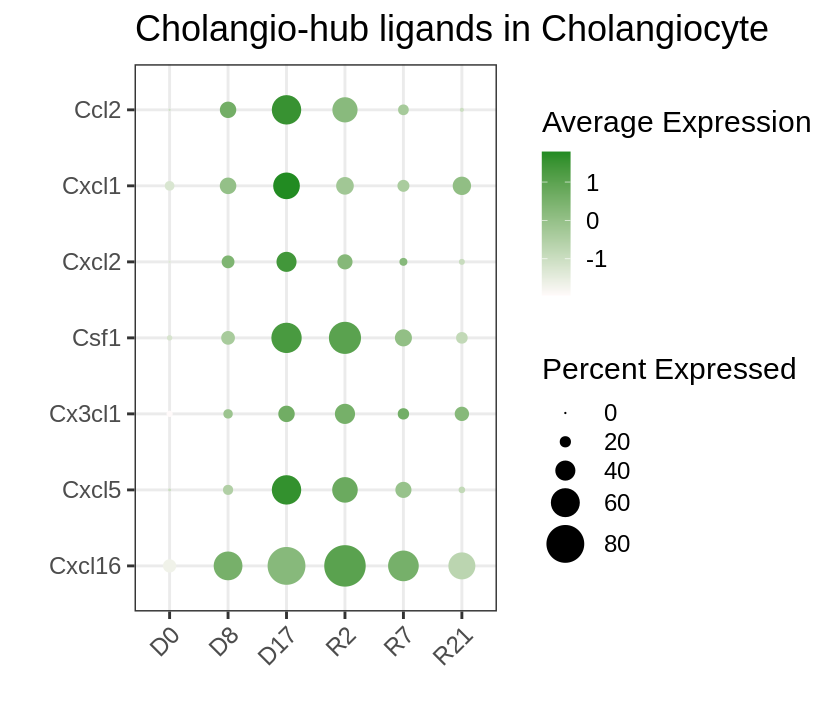

In [86]:
Idents(data)='annotation'
Chol=subset(data,idents=c("Cholangiocyte"))
gene=c("Ccl2","Cxcl1","Cxcl2","Csf1","Cx3cl1","Cxcl5","Cxcl16")
options(repr.plot.width=7, repr.plot.height=6)
p=DotPlot(Chol,features=rev(gene),dot.scale=11,cols = c("Snow", "#228B22"),group.by="time")+scale_y_discrete("")+scale_x_discrete("")+coord_flip()
p2=p+theme(panel.grid=element_blank())+theme_bw(base_size = 18)+RotatedAxis()+labs(x=NULL,y=NULL)+ggtitle("Cholangio-hub ligands in Cholangiocyte")
plot(p2)

In [87]:
ref.cholangioctyeimmune <- list(c("Ccl2","Cxcl1","Cxcl2","Csf1","Cx3cl1","Cxcl5","Cxcl16"))
for (i in ls(pattern = "ref.")) {
  Chol<- AddModuleScore(object = Chol, features = get(i), name = gsub("ref.", "", i))
}; rm(i)

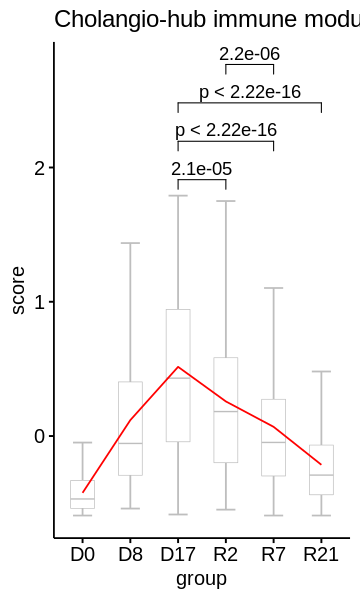

In [88]:
# calculate p-value and plot.
Cholselect=Chol@meta.data[,c('time','annotation','cholangioctyeimmune1')]
colnames(Cholselect)=c('group','annotation',"score")
df=Cholselect
df$score=as.numeric(df$score)
df$score[df$score> quantile(df$score,0.995)[[1]]]=quantile(df$score,0.995)[[1]]
df$score[df$score< quantile(df$score,0.005)[[1]]]=quantile(df$score,0.005)[[1]]
my_comparisons=list(c("D17","R2"),c("D17","R7"),c("D17","R21"),c("R2","R7"))

options(repr.plot.width = 3, repr.plot.height = 5)
p=ggboxplot(df,x ="group",y= "score",
             bxp.errorbar=T,
             width=0.5,
             color="gray",size=0.2,outlier.shape = NA)+ggtitle("Cholangio-hub immune module in Cholangiocyte difftime")+
  stat_summary(fun.y=mean, colour="red", geom="line", aes(group = 1))+stat_compare_means(comparisons = my_comparisons)
p

## Fig.5f

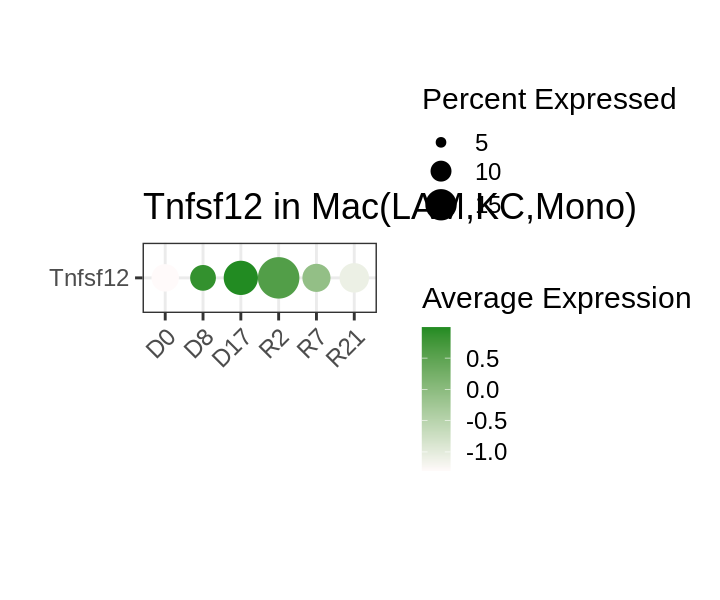

In [89]:
# environment in Fig.5e
Mac=subset(data,idents=c("KC","LAM","Monocyte"))
feature=c("Tnfsf12")
options(repr.plot.width=6, repr.plot.height=5)
p=DotPlot(Mac,features=rev(feature),dot.scale=11,cols = c("Snow", "#228B22"),group.by="time",scale.min=1)+scale_y_discrete("")+scale_x_discrete("")+coord_flip()
p2=p+theme(panel.grid=element_blank())+theme_bw(base_size = 18)+RotatedAxis()+labs(x=NULL,y=NULL)+ggtitle("Tnfsf12 in Mac(LAM,KC,Mono)")+theme(aspect.ratio=0.3)
p2

## Fig.5g

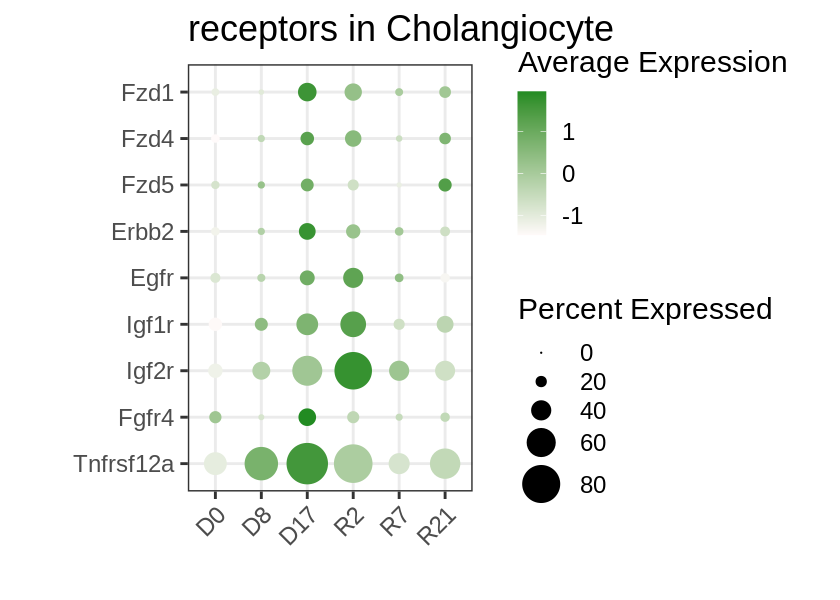

In [90]:
# environment in Fig.5e
gene=unique(c("Fzd1","Fzd4","Fzd5","Erbb2","Egfr","Igf1r","Igf2r","Fgfr4","Tnfrsf12a"))
options(repr.plot.width=7, repr.plot.height=5)
p=DotPlot(Chol,features=rev(gene),dot.scale=11,cols = c("Snow", "#228B22"),group.by="time",scale.min=0)+scale_y_discrete("")+scale_x_discrete("")+coord_flip()
p2=p+theme(panel.grid=element_blank())+theme_bw(base_size = 18)+RotatedAxis()+labs(x=NULL,y=NULL)+ggtitle("receptors in Cholangiocyte")+theme(aspect.ratio=1.5)
plot(p2)

# Fig.6

## Fig.6a

In [91]:
library("Seurat")
library("dplyr")
library("ggplot2")
library(patchwork)
library(viridis)
data <- spatialdata
gene_1=read.csv("/sibcb1/huilijianlab1/wubohua/R/BGI_20211223/Spatial_20230523/zonation_filter/expression_Allspatialgenes_eachzone_expressionratio0.001_20230523.csv",row.names=1)
# this table calculate the average expression of each genes in each layer at different time points, and keep the genes whose expressed ratio > 1‰ bins in at least one timepoint.

In [92]:
info=t(gene_1["Mki67",])
info=as.data.frame(info)
colnames(info)="Expression"
info$time=rep(c("D0","D8","D17","R2","R7","R21"),each = 9)
info$time=factor(info$time,levels=c("D0","D8","D17","R2","R7","R21"))
info$layer=rep(c("1","2","3","4","5","6","7","8","9"),6)
info$layer = as.numeric(info$layer)

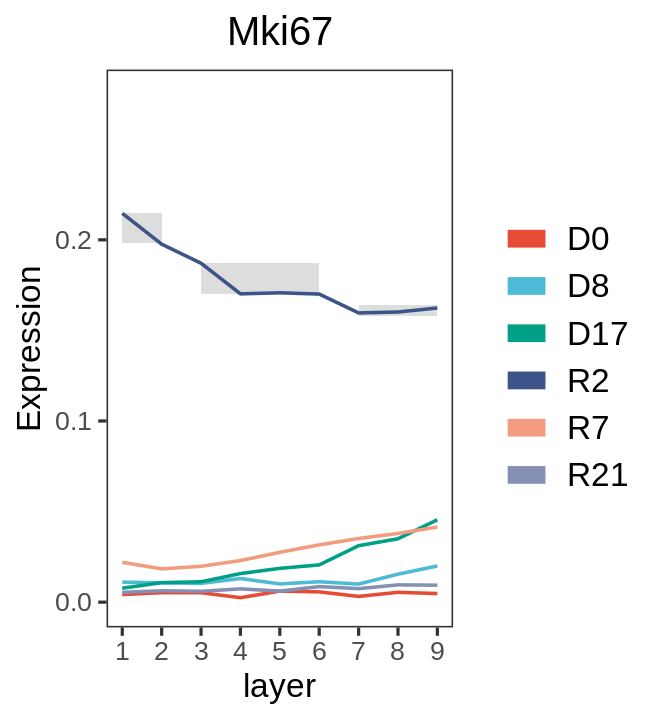

In [93]:
theme_set(theme_bw(base_size = 20))
options(repr.plot.width = 5.5, repr.plot.height = 6)
p <- ggplot(info, aes(x = layer, y = Expression, color = time))+
  ylim(0,0.28)+
  annotate("rect",xmin=1,xmax=2,ymin=0.198,ymax=0.215,alpha = .2)+ 
  annotate("rect",xmin=3,xmax=6,ymin=0.170,ymax=0.187,alpha = .2)+
  annotate("rect",xmin=7,xmax=9,ymin=0.158,ymax=0.164,alpha = .2)+
  geom_line(size = 1) +
  scale_x_continuous(breaks = c(1:9)) + labs(title = "Mki67") + theme(plot.title = element_text(hjust = 0.5)) +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+  theme(legend.title = element_blank(), 
                                                    legend.key=element_rect(fill='white'), 
                                                    legend.text = element_text(size=20), 
                                                    legend.key.size=unit(1,'cm') ) +  
  guides(color = guide_legend(override.aes = list(size=5)))
p2= p +scale_color_npg()
p2


central     mid  portal 
  46987   93967   70477 

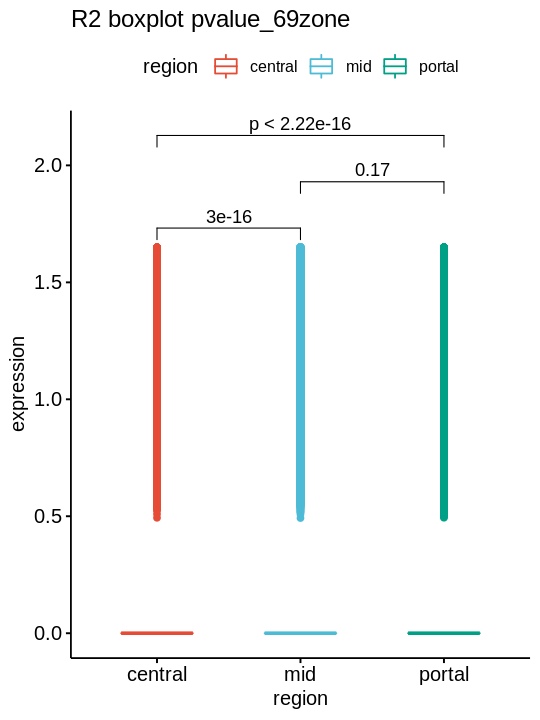

In [94]:
# calculate p-value
data_R2=subset(data,subset=time == "R2")
data_R2$region='0'
data_R2$region[data_R2$rank %in% c("1","2")]="central"
data_R2$region[data_R2$rank %in% c("3","4","5","6")]="mid"
data_R2$region[data_R2$rank %in% c("7","8","9")]="portal"
table(data_R2$region)
library(ggpubr)
library(patchwork)
set.seed(123)

df_R2=data_R2@meta.data[,c("region"),drop=F]
expression=data_R2@assays$RNA@data["Mki67",row.names(data_R2@meta.data)]
df_R2_2=merge(df_R2,expression,by=0)
row.names(df_R2_2)=df_R2_2[,1]
df_R2_2=df_R2_2[,-1]
colnames(df_R2_2)=c("region","expression")
df_R2_2$expression[df_R2_2$expression> quantile(df_R2_2$expression,0.995)[[1]]]=quantile(df_R2_2$expression,0.995)[[1]]
df_R2_2$expression[df_R2_2$expression< quantile(df_R2_2$expression,0.005)[[1]]]=quantile(df_R2_2$expression,0.005)[[1]]

my_comparisons=list(c("mid","central"),c("mid","portal"),c("central","portal"))
df_R2_2$expression=as.numeric(df_R2_2$expression)
options(repr.plot.width = 4.5, repr.plot.height = 6)
p1=ggboxplot(df_R2_2, x = "region", y = "expression",
             bxp.errorbar=T,
             width = 0.5,
             color = "region", 
             palette="npg")+ stat_compare_means(comparisons=my_comparisons)+ggtitle("R2 boxplot pvalue_69zone")
p1

## Fig.6b

In [95]:
# environment in Fig.6a
PlotLR=function(ligand,receptor){
  Ligandinfo=gene_1[ligand,]
  Receptorinfo=gene_1[receptor,]
  a=t(Ligandinfo)
  b=t(Receptorinfo)
  form<-data.frame(cbind(a,b))
  form$c <- form[,1] * form[,2]
  d=t(form[,3])
  colnames(d)=rownames(form)
  rownames(d)=paste(ligand,"_",receptor)
  return(d)
}

In [96]:
LRlist=c('Postn_Egfr','Igf2_Igf2r','Sfrp1_Fzd2','Wnt5a_Ror2','Tgfb2_Tgfbr1')
a=1
for (i in LRlist){ 
  if (a==1){
    LR=strsplit(i, '_')
    infoLRall=PlotLR(LR[[1]][1],LR[[1]][2])
    a=2
  }else{
    LR=strsplit(i, '_')
    infoLR=PlotLR(LR[[1]][1],LR[[1]][2])
    infoLRall=rbind(infoLRall,infoLR)
  }
}
infoLRall=na.omit(infoLRall)

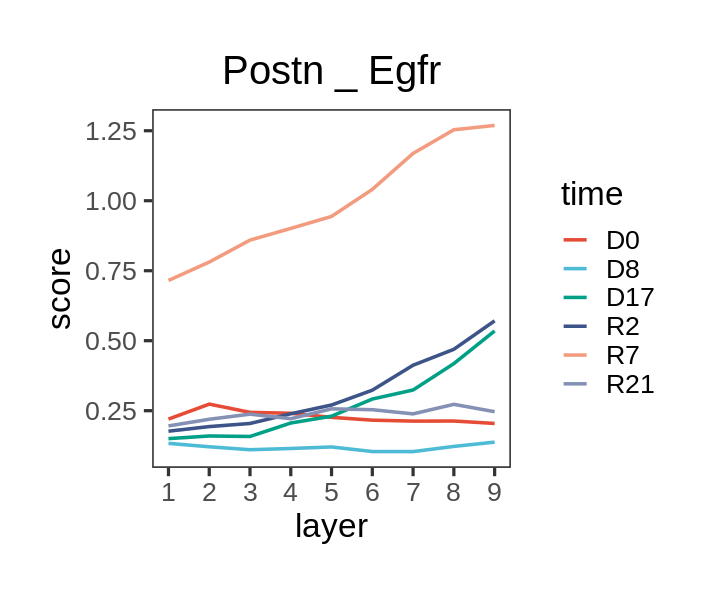

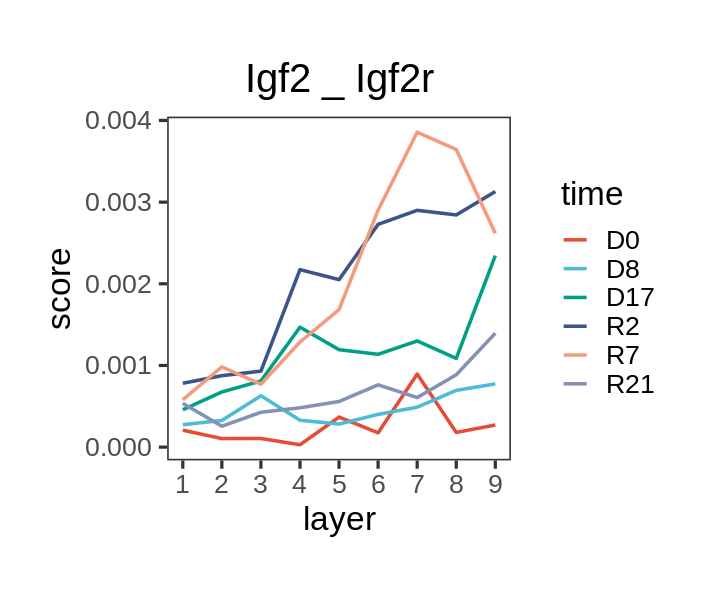

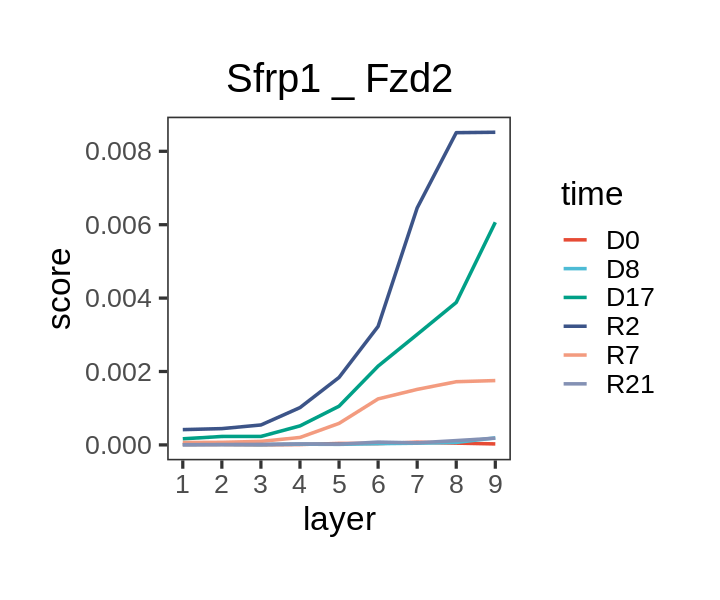

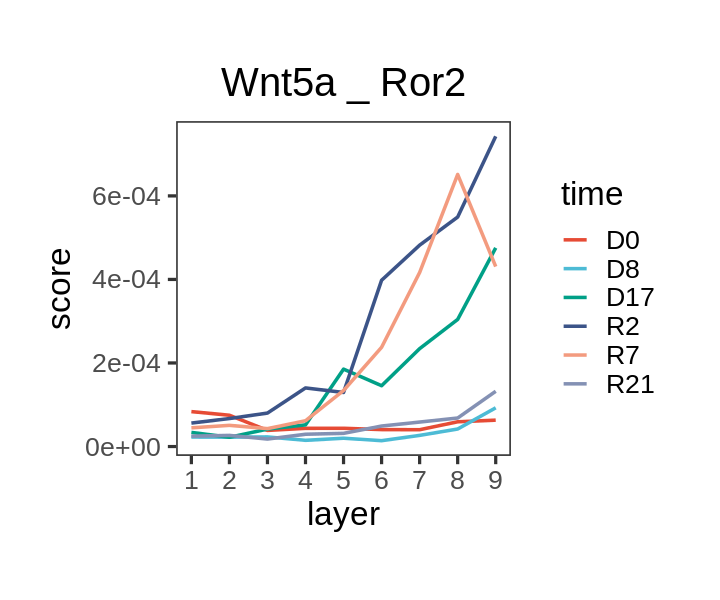

[1] 6


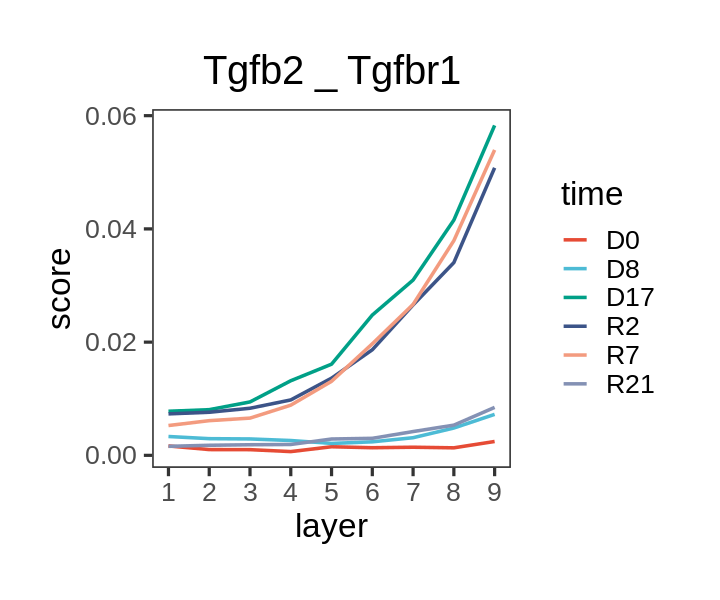

In [97]:
x=1
for (i in row.names(infoLRall)){ 
  LRscore = as.data.frame(matrix(nrow=54,ncol=0))
  LRscore$score=infoLRall[i,]
  row.names(LRscore)=colnames(infoLRall)
  LRscore$time=rep(c("D0","D8","D17","R2","R7","R21"),each = 9)
  LRscore$time=factor(LRscore$time,levels=c("D0","D8","D17","R2","R7","R21"))
  LRscore$layer=rep(c("1","2","3","4","5","6","7","8","9"),6)
  LRscore$layer = as.numeric(LRscore$layer)
  theme_set(theme_bw(base_size = 20))
  options(repr.plot.width = 6, repr.plot.height = 5)
  p <- ggplot(LRscore, aes(x = layer, y = score, color = time)) + geom_line(size = 1) +
    scale_x_continuous(breaks = c(1:9)) + labs(title = i) + theme(plot.title = element_text(hjust = 0.5),panel.grid.major = element_blank(),panel.grid.minor = element_blank())+
    theme(plot.margin=unit(rep(1,4),'cm'))+theme(aspect.ratio=1)+scale_color_npg()
  plot(p)
  assign(paste("p",sep = "",x),p)
  x=x+1
}
print(x)

## Fig.6d

In [98]:
library("Seurat")
library("dplyr")
library("ggplot2")
library("ggpubr")
data <- scdata

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



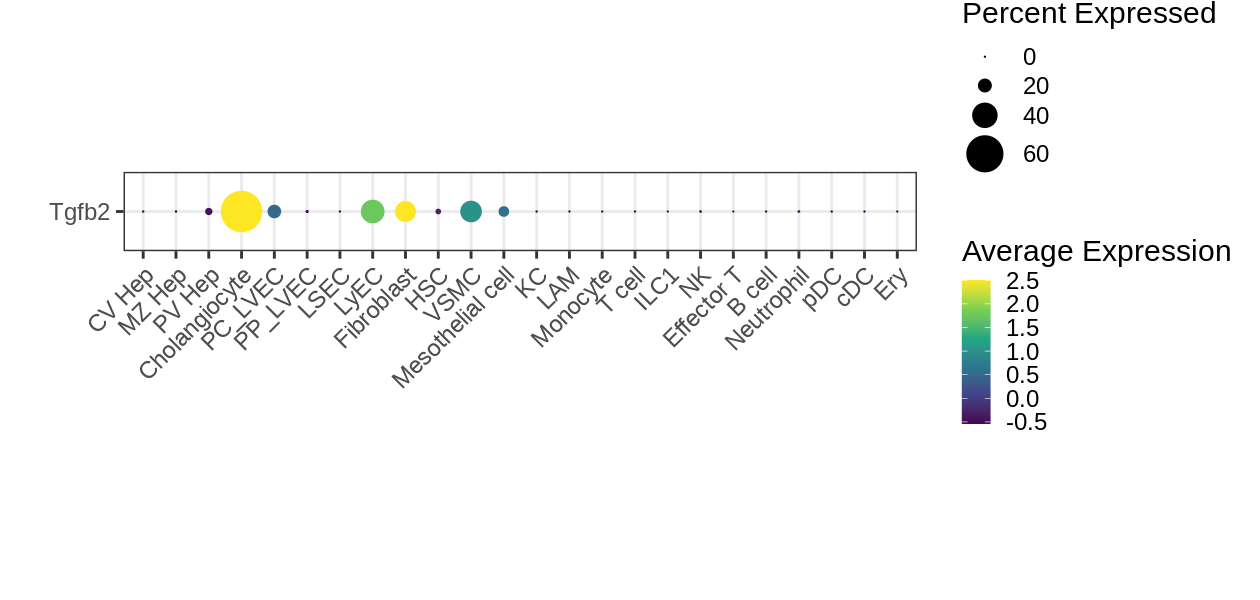

In [99]:
Idents(data)="time"
R2=subset(data,idents= "R2")
Idents(R2)="anno_Hepzone"
gene=c("Tgfb2")
options(repr.plot.width=10.5, repr.plot.height=5)
p=DotPlot(R2,features=rev(gene),dot.scale=11)+scale_y_discrete("")+scale_x_discrete("")+coord_flip()
p2=p+theme(panel.grid=element_blank())+theme_bw(base_size = 18)+RotatedAxis()+
  scale_color_viridis_c()+labs(x=NULL,y=NULL)+theme(aspect.ratio=0.1)
plot(p2)

## Fig.6f

In [100]:
# environment in Fig.6a
data <- spatialdata

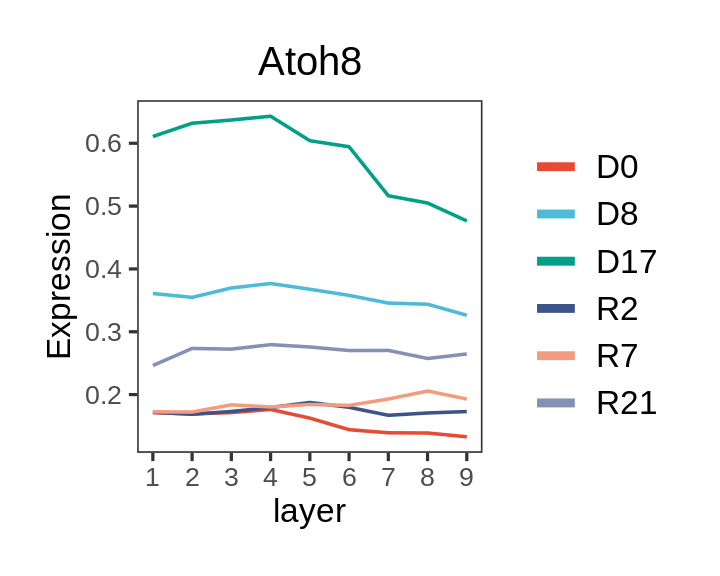

In [101]:
library(ggsci)
info=as.matrix(gene_1)
LRlist=c("Atoh8")
for (i in LRlist){ 
  #print(i)
  LRscore = as.data.frame(matrix(nrow=54,ncol=0))
  LRscore$Expression=info[i,]
  row.names(LRscore)=colnames(info)
  LRscore$time=rep(c("D0","D8","D17","R2","R7","R21"),each = 9)
  LRscore$time=factor(LRscore$time,levels=c("D0","D8","D17","R2","R7","R21"))
  LRscore$layer=rep(c("1","2","3","4","5","6","7","8","9"),6)
  #print(LRscore)
  LRscore$layer = as.numeric(LRscore$layer)
  theme_set(theme_bw(base_size = 20))
  options(repr.plot.width = 6, repr.plot.height = 4.8)
  p <- ggplot(LRscore, aes(x = layer, y = Expression, color = time)) + geom_line(size = 1) +
    scale_x_continuous(breaks = c(1:9)) + labs(title = i) + theme(plot.title = element_text(hjust = 0.5),panel.grid.major = element_blank(),panel.grid.minor = element_blank())+
    theme(plot.margin=unit(rep(1,4),'cm'))+scale_color_npg()+  theme(legend.title = element_blank(), 
                                                                     legend.key=element_rect(fill='white'), 
                                                                     legend.text = element_text(size=20),
                                                                     legend.key.size=unit(1,'cm') ) +  
    guides(color = guide_legend(override.aes = list(size=2.5)))
  plot(p)
  
}

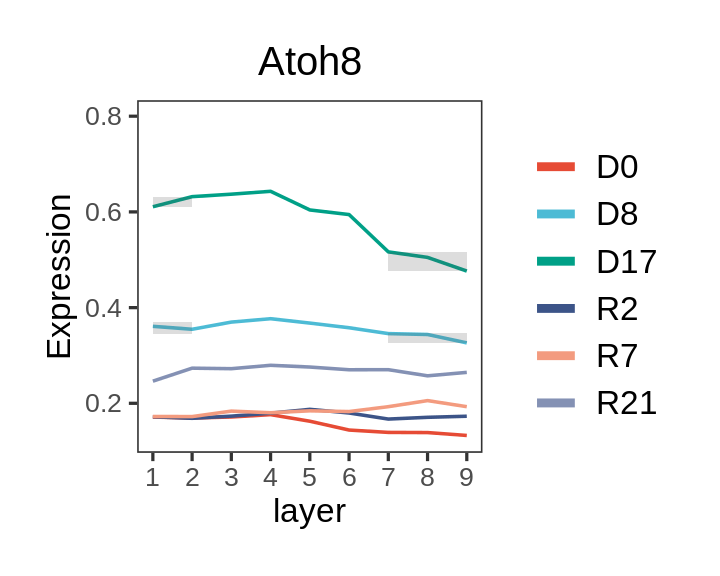

In [102]:
options(repr.plot.width = 6, repr.plot.height = 4.8)
p2=p+ylim(0.13, 0.8)+
  annotate("rect",xmin=1,xmax=2,ymin=0.611,ymax=0.632,alpha = .2)+
  annotate("rect",xmin=7,xmax=9,ymin=0.476,ymax=0.516,alpha = .2)+
  annotate("rect",xmin=1,xmax=2,ymin=0.345,ymax=0.370,alpha = .2)+
  annotate("rect",xmin=7,xmax=9,ymin=0.326,ymax=0.346,alpha = .2)
p2

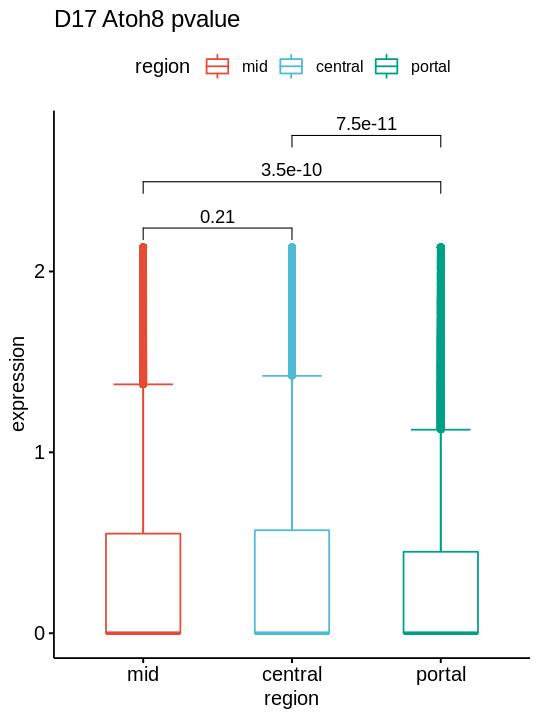

In [103]:
# calculate p-value
data_D17=subset(data,subset=time== "D17")
data_D17$region='0'
data_D17$region[data_D17$rank %in% c("1","2")]="central"
data_D17$region[data_D17$rank %in% c("3","4","5","6")]="mid"
data_D17$region[data_D17$rank %in% c("7","8","9")]="portal"
df_D17=data_D17@meta.data[,c("region"),drop=F]
expression=data_D17@assays$RNA@data["Atoh8",row.names(data_D17@meta.data)]
df_D17_2=merge(df_D17,expression,by=0)
row.names(df_D17_2)=df_D17_2[,1]
df_D17_2=df_D17_2[,-1]
colnames(df_D17_2)=c("region","expression")
df_D17_2$expression[df_D17_2$expression> quantile(df_D17_2$expression,0.995)[[1]]]=quantile(df_D17_2$expression,0.995)[[1]]
df_D17_2$expression[df_D17_2$expression< quantile(df_D17_2$expression,0.005)[[1]]]=quantile(df_D17_2$expression,0.005)[[1]]
my_comparisons=list(c("mid","central"),c("mid","portal"),c("central","portal"))
df_D17_2$expression=as.numeric(df_D17_2$expression)
options(repr.plot.width = 4.5, repr.plot.height = 6)
p1=ggboxplot(df_D17_2, x = "region", y = "expression",
             bxp.errorbar=T,
             width = 0.5,
             color = "region", 
             palette="npg")+ stat_compare_means(comparisons=my_comparisons)+ggtitle("D17 Atoh8 pvalue")
p1

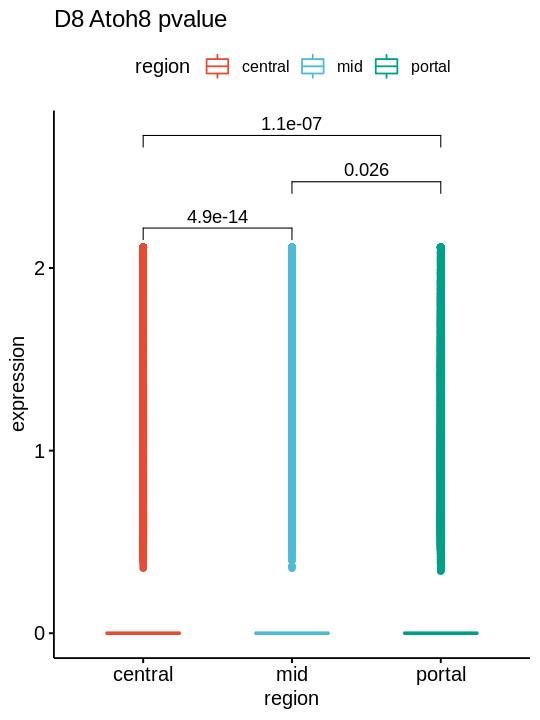

In [104]:
data_D8=subset(data,subset=time == "D8")
data_D8$region='0'
data_D8$region[data_D8$rank %in% c("1","2")]="central"
data_D8$region[data_D8$rank %in% c("3","4","5","6")]="mid"
data_D8$region[data_D8$rank %in% c("7","8","9")]="portal"
df_D8=data_D8@meta.data[,c("region"),drop=F]
expression=data_D8@assays$RNA@data["Atoh8",row.names(data_D8@meta.data)]
df_D8_2=merge(df_D8,expression,by=0)
row.names(df_D8_2)=df_D8_2[,1]
df_D8_2=df_D8_2[,-1]
colnames(df_D8_2)=c("region","expression")
df_D8_2$expression[df_D8_2$expression> quantile(df_D8_2$expression,0.995)[[1]]]=quantile(df_D8_2$expression,0.995)[[1]]
df_D8_2$expression[df_D8_2$expression< quantile(df_D8_2$expression,0.005)[[1]]]=quantile(df_D8_2$expression,0.005)[[1]]
my_comparisons=list(c("mid","central"),c("mid","portal"),c("central","portal"))
df_D8_2$expression=as.numeric(df_D8_2$expression)
library(ggpubr)
library(patchwork)
set.seed(123)
options(repr.plot.width = 4.5, repr.plot.height = 6)
p2=ggboxplot(df_D8_2, x = "region", y = "expression",
             bxp.errorbar=T,
             width = 0.5,
             color = "region", 
             palette="npg")+ stat_compare_means(comparisons=my_comparisons)+ggtitle("D8 Atoh8 pvalue")
p2

## Fig.6h

In [105]:
# this figure was plotted in GraphPad using DEG list in the Supplementary table 3.